In [8]:
# system stuff
import sys
sys.path.append("..")
import datetime

# galpy stuff
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

# auriga stuff
from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

# main packages stuff
import numpy as np
from scipy import stats

# python stuff
import random
import copy

# plot stuff
from IPython.display import Image, display
import corner

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from matplotlib import rcParams
from matplotlib import colors

%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'
cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))

# display stuff
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [9]:
# Simulation relevant stuff
machine = 'virgo'
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
    

In [10]:
# load potential parameters
R0_kpc_all, v0_kms_all, a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all = np.loadtxt(filedir + 'potential/fitted_potential_params_jan19.txt')

n_MND  = v0_MND_kms_all**2  / v0_kms_all**2
n_NFWH = v0_NFWH_kms_all**2 / v0_kms_all**2
n_HB   = v0_HB_kms_all**2   / v0_kms_all**2

In [11]:
def setup_galpy_potential(a_MND_kpc, b_MND_kpc, a_NFWH_kpc, a_HB_kpc, n_MND, n_NFWH, n_HB, _REFR0_kpc):
    
    #test input:
    if (a_MND_kpc <= 0.) or (b_MND_kpc <= 0.) or (a_NFWH_kpc <= 0.) or (a_HB_kpc <= 0.) \
       or (n_MND <= 0.) or (n_NFWH <= 0.) or (n_HB <= 0.) or (n_MND >= 1.) or (n_NFWH >= 1.) or (n_HB >= 1.):
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The input parameters for the scaling profiles do not correspond to a physical potential.')
    if np.fabs(n_MND + n_NFWH + n_HB - 1.) > 2e-2:
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The sum of the normalization does not add up to 1.')
        
    #trafo to galpy units:
    a_MND  = a_MND_kpc  / _REFR0_kpc
    b_MND  = b_MND_kpc  / _REFR0_kpc
    a_NFWH = a_NFWH_kpc / _REFR0_kpc
    a_HB   = a_HB_kpc   / _REFR0_kpc
    
    #setup potential:
    disk = MiyamotoNagaiPotential(
                a = a_MND,
                b = b_MND,
                normalize = n_MND)
    halo = NFWPotential(
                a = a_NFWH,
                normalize = n_NFWH)
    bulge = HernquistPotential(
                a = a_HB,
                normalize = n_HB) 
     
    return [disk,halo,bulge]

exclude particles which are in disk
level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0007868712714088.
14:30:27.999948
0
14:30:48.876332
1000
14:31:09.798683
2000
14:31:30.669394
3000
14:31:51.551426
4000
14:32:12.448312
5000
14:32:33.553560
6000
14:32:58.932936
7000
14:33:52.310234
8000
14:34:43.637780
9000
14:35:25.422810
10000
14:36:07.914355
11000
14:36:43.662912
12000
14:37:23.211722
13000
14:38:00.147038
14000
14:38:39.712623
15000
14:39:18.444216
16000
14:39:55.527396
17000
14:40:29.868713
18000
14:41:01.458764
19000
14:41:28.673300
20000
14:42:04.158865
21000
14:42:51.477952
22000


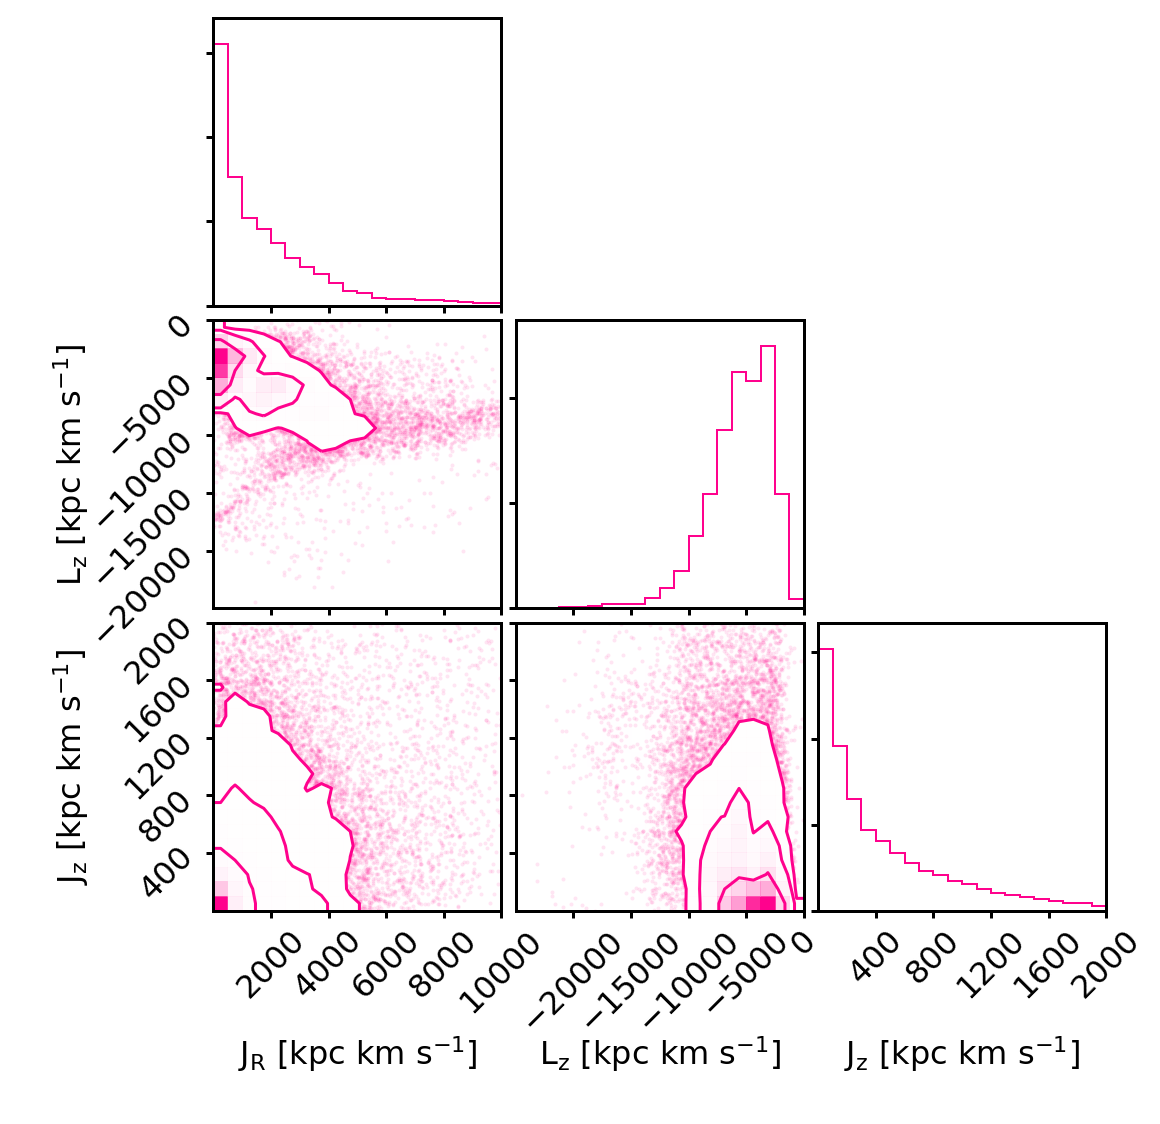

level   : 4
halo    : 24
snapnr  : 126
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1774142 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023996514081954957
redshift: 0.009521666967944764
time    : 0.99056814006128
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0004838839599297.
14:45:14.743757
0
14:46:00.524159
1000
14:46:43.756127
2000
14:47:29.810532
3000
14:48:10.135568
4000
14:48:53.758854
5000
14:49:37.217687
6000
14:50:22.851514
7000
14:51:09.275949
8000
14:51:54.865780
9000
14:52:41.443013
10000
14:53:29.182014
11000
14:54:16.036973
12000
14:55:00.007532
13000
14:55:38.587271
14000
14:56:08.943694
15000
14:56:48.116416
16000
14:57:29.244740
17000
14:58:10.168445
18000
14:58:52.301595
19000
14:59:36.624701
20000
15:00:24.080469
21000
15:01:11.402188
22000
15:01:56.648419
23000
15:02:35.991320


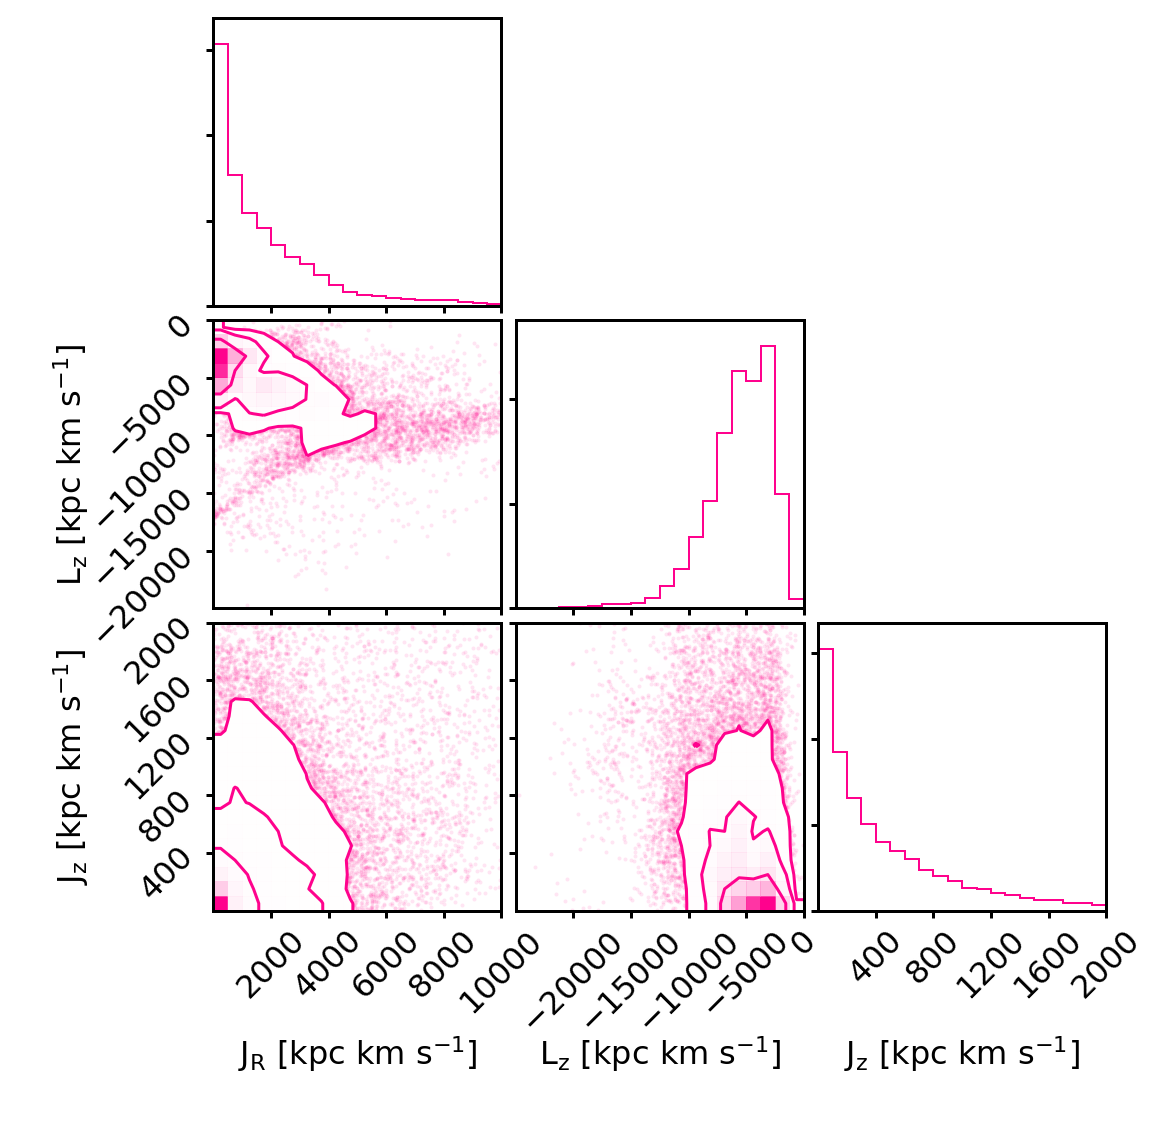

level   : 4
halo    : 24
snapnr  : 125
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1769475 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023806245625019075
redshift: 0.023974428382762536
time    : 0.9765868876036025
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9998653773018424.
15:03:53.547780
0
15:04:51.441358
1000
15:05:53.086901
2000
15:06:52.144140
3000
15:07:53.004223
4000
15:08:35.227147
5000
15:09:30.103071
6000
15:10:26.919392
7000
15:11:20.160628
8000
15:12:09.774883
9000
15:13:00.293631
10000
15:13:55.558052
11000
15:14:50.751767
12000
15:15:24.934114
13000
15:16:13.734354
14000
15:17:06.056225
15000
15:17:53.227949
16000
15:18:25.056344
17000
15:19:20.825926
18000
15:20:16.130106
19000
15:21:07.812986
20000
15:21:46.869496
21000
15:22:26.177406
22000
15:23:14.153586
23000
15:24:00.32948

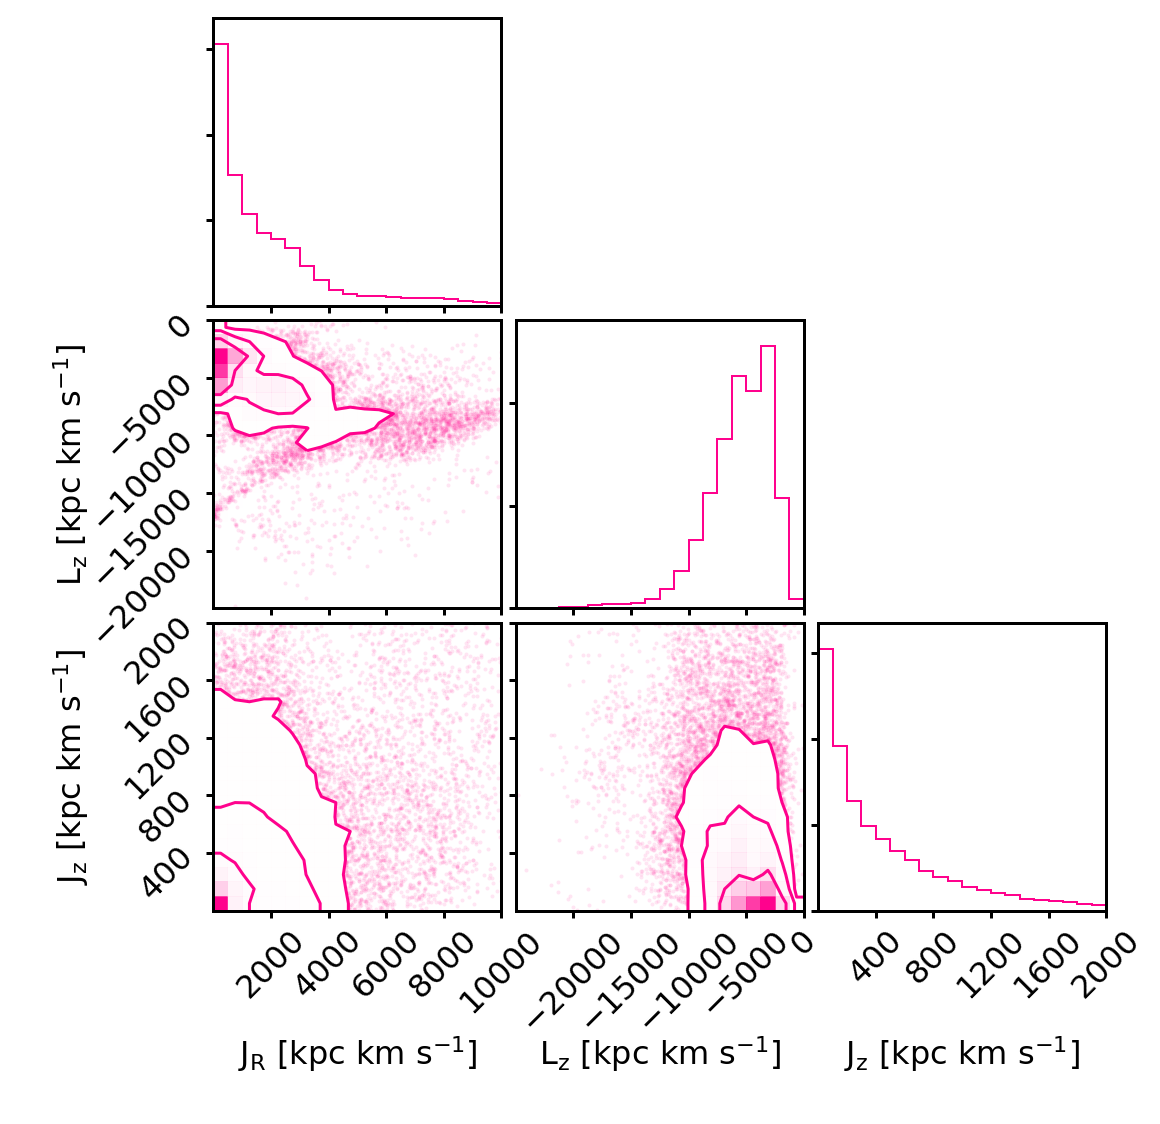

level   : 4
halo    : 24
snapnr  : 124
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1758643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02354053109884262
redshift: 0.0337243718735154
time    : 0.9673758568617342
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9993893826829565.
15:25:14.858979
0
15:26:00.549609
1000
15:26:44.384126
2000
15:27:35.965089
3000
15:28:24.637090
4000
15:29:03.196267
5000
15:29:57.287915
6000
15:30:50.970955
7000
15:31:45.837317
8000
15:32:39.050554
9000
15:33:32.944036
10000
15:34:26.560681
11000
15:35:19.736782
12000
15:36:01.013127
13000
15:36:45.472277
14000
15:37:27.350193
15000
15:38:13.591782
16000
15:39:05.420595
17000
15:39:53.939233
18000
15:40:33.280285
19000
15:41:15.522347
20000
15:42:03.770917
21000
15:42:40.618095
22000
15:43:23.897480
23000
15:44:12.374953
2

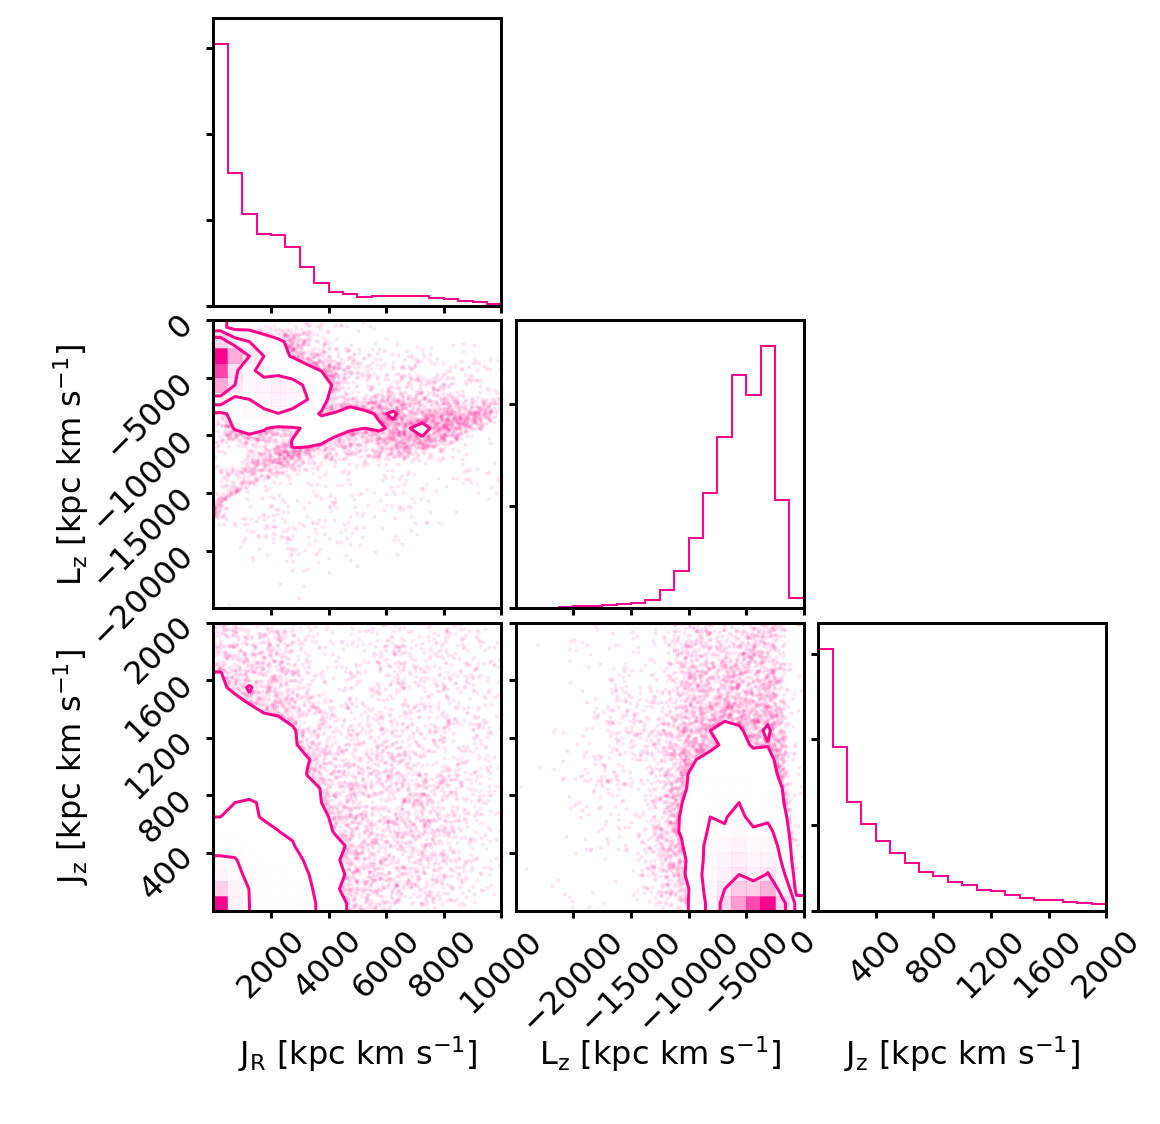

level   : 4
halo    : 24
snapnr  : 123
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755878 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02335823625326157
redshift: 0.04852362998180593
time    : 0.9537219490392906
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9986476048290688.
15:45:27.753184
0
15:46:28.300012
1000
15:47:25.232148
2000
15:48:17.694729
3000
15:49:02.228087
4000
15:49:48.560395
5000
15:50:42.635638
6000
15:51:37.145552
7000
15:52:29.012215
8000
15:53:11.405806
9000
15:53:56.263889
10000
15:54:44.986252
11000
15:55:33.104007
12000
15:56:13.300481
13000
15:57:05.272479
14000
15:58:03.067763
15000
15:59:01.112333
16000
16:00:03.830064
17000
16:01:01.836672
18000
16:01:56.777554
19000
16:02:24.825124
20000
16:03:01.561992
21000
16:03:52.136674
22000
16:04:45.542446
23000
16:05:40.681259


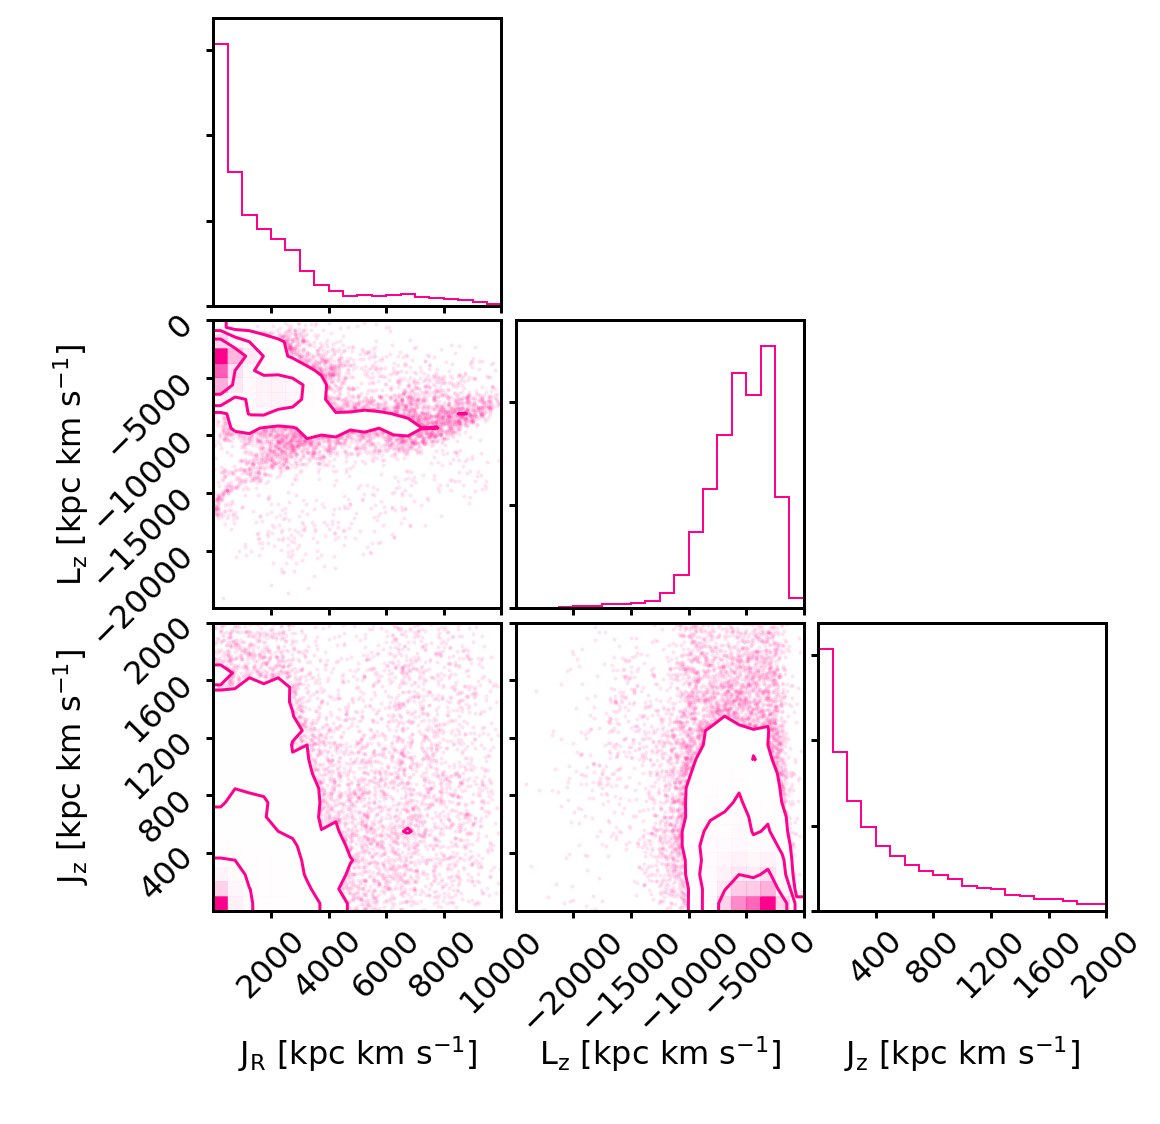

level   : 4
halo    : 24
snapnr  : 122
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023272740840911868
redshift: 0.058507322794512984
time    : 0.9447265771954694
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9981678386024384.
16:07:00.279984
0
16:07:57.073819
1000
16:08:44.262753
2000
16:09:31.509033
3000
16:10:23.691626
4000
16:11:19.670165
5000
16:12:16.671812
6000
16:13:13.232625
7000
16:14:07.324155
8000
16:15:00.800163
9000
16:15:40.583914
10000
16:16:34.813143
11000
16:17:27.705411
12000
16:18:26.067895
13000
16:19:21.602551
14000
16:20:16.416047
15000
16:21:12.667013
16000
16:22:02.805880
17000
16:22:57.518739
18000
16:23:40.889539
19000
16:24:30.506003
20000
16:25:24.143553
21000
16:26:16.303523
22000
16:27:11.025895
23000
16:28:02.91835

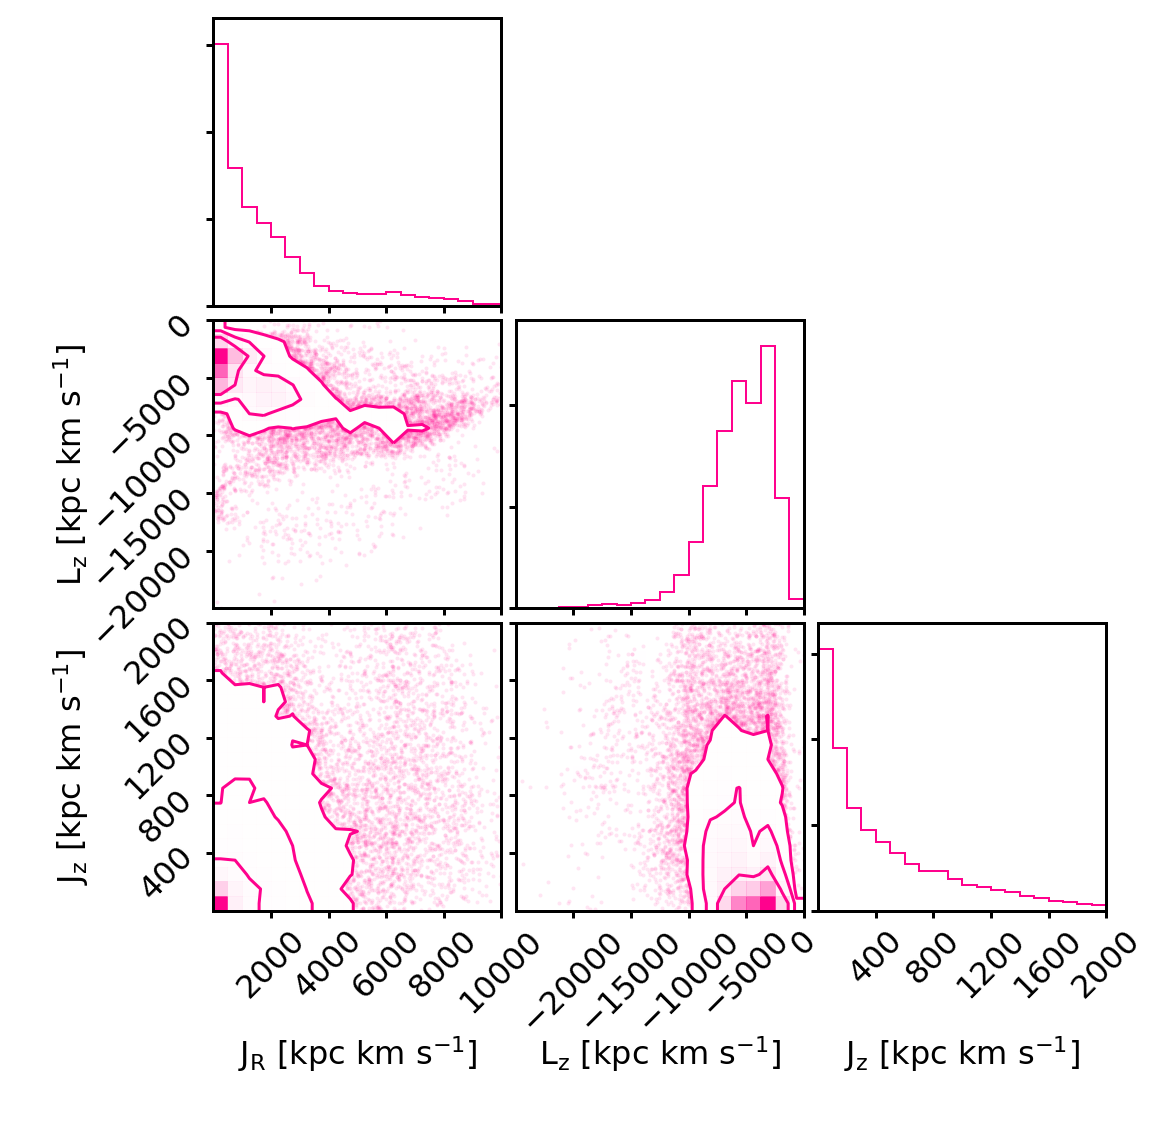

level   : 4
halo    : 24
snapnr  : 121
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1736454 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023151549696922305
redshift: 0.07366138465643868
time    : 0.9313923498515226
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9975168665513926.
16:29:06.412104
0
16:30:07.353979
1000
16:31:08.186201
2000
16:32:04.649404
3000
16:33:01.688484
4000
16:34:01.666795
5000
16:34:42.152267
6000
16:35:36.451572
7000
16:36:32.972815
8000
16:37:31.662589
9000
16:38:30.271594
10000
16:39:29.228225
11000
16:40:28.050267
12000
16:41:09.575355
13000
16:42:04.159204
14000
16:42:59.838282
15000
16:43:55.730984
16000
16:44:41.026821
17000
16:45:16.942379
18000
16:46:11.669104
19000
16:47:08.138375
20000
16:47:54.673820
21000
16:48:51.996732
22000
16:49:49.445519
23000
16:50:41.837741

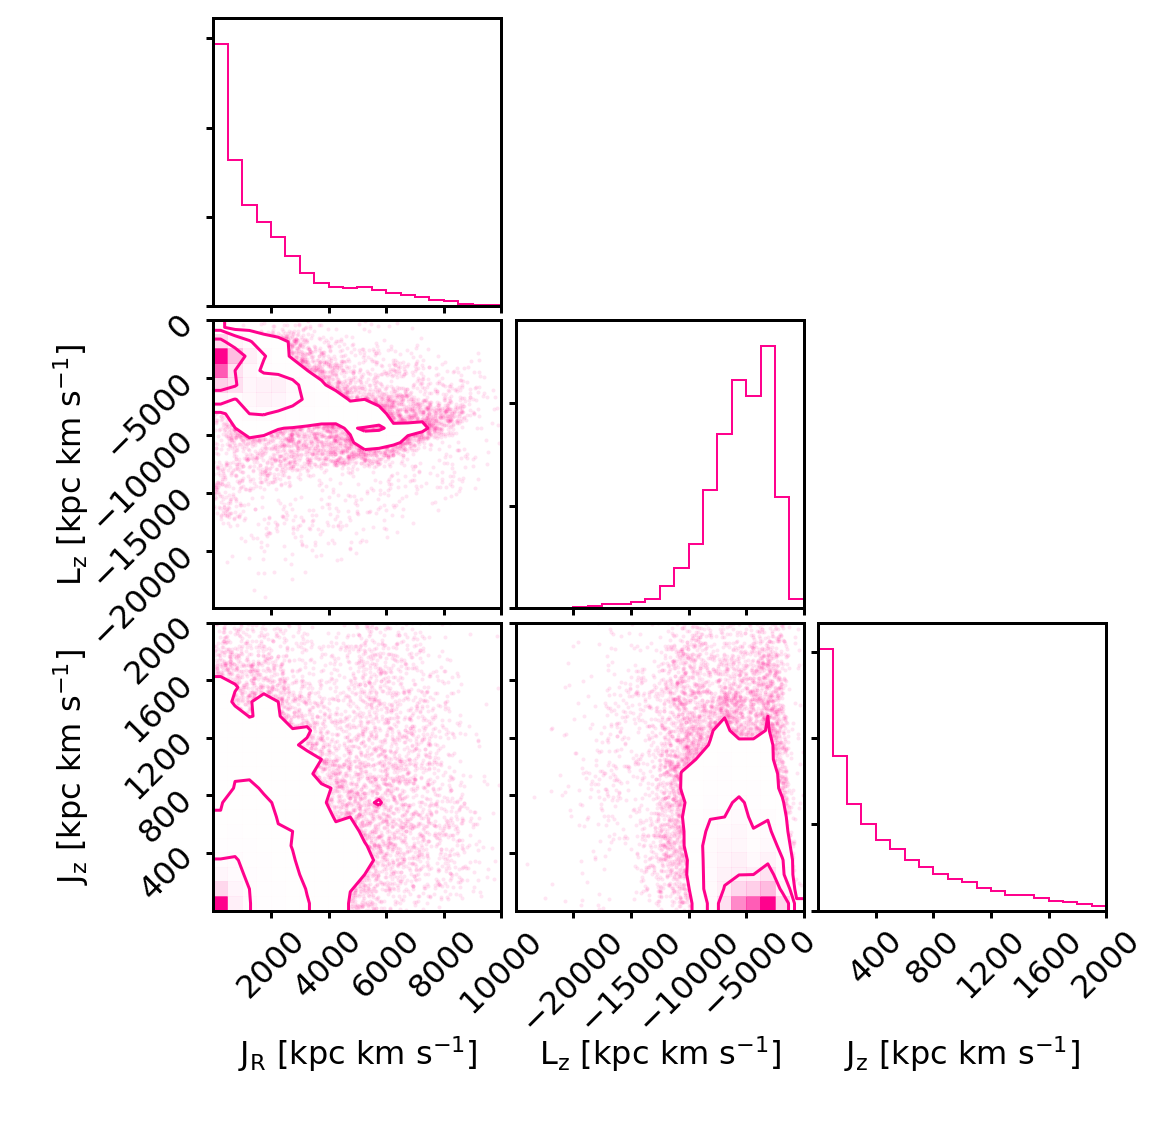

level   : 4
halo    : 24
snapnr  : 120
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1726323 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023094923794269563
redshift: 0.08388443079747931
time    : 0.9226075876597282
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9971498706140278.
16:52:02.054051
0
16:52:53.870914
1000
16:53:36.136117
2000
16:54:31.950074
3000
16:55:31.735016
4000
16:56:33.047525
5000
16:57:31.849119
6000
16:58:26.363426
7000
16:59:19.150774
8000
16:59:57.976766
9000
17:00:52.679424
10000
17:01:48.128080
11000
17:02:45.084275
12000
17:03:41.398349
13000
17:04:37.466052
14000
17:05:37.643294
15000
17:06:07.946639
16000
17:06:50.084095
17000
17:07:43.586198
18000
17:08:34.203499
19000
17:09:22.859858
20000
17:10:11.319283
21000
17:11:00.871376
22000
17:11:55.425440
23000
17:12:50.152841

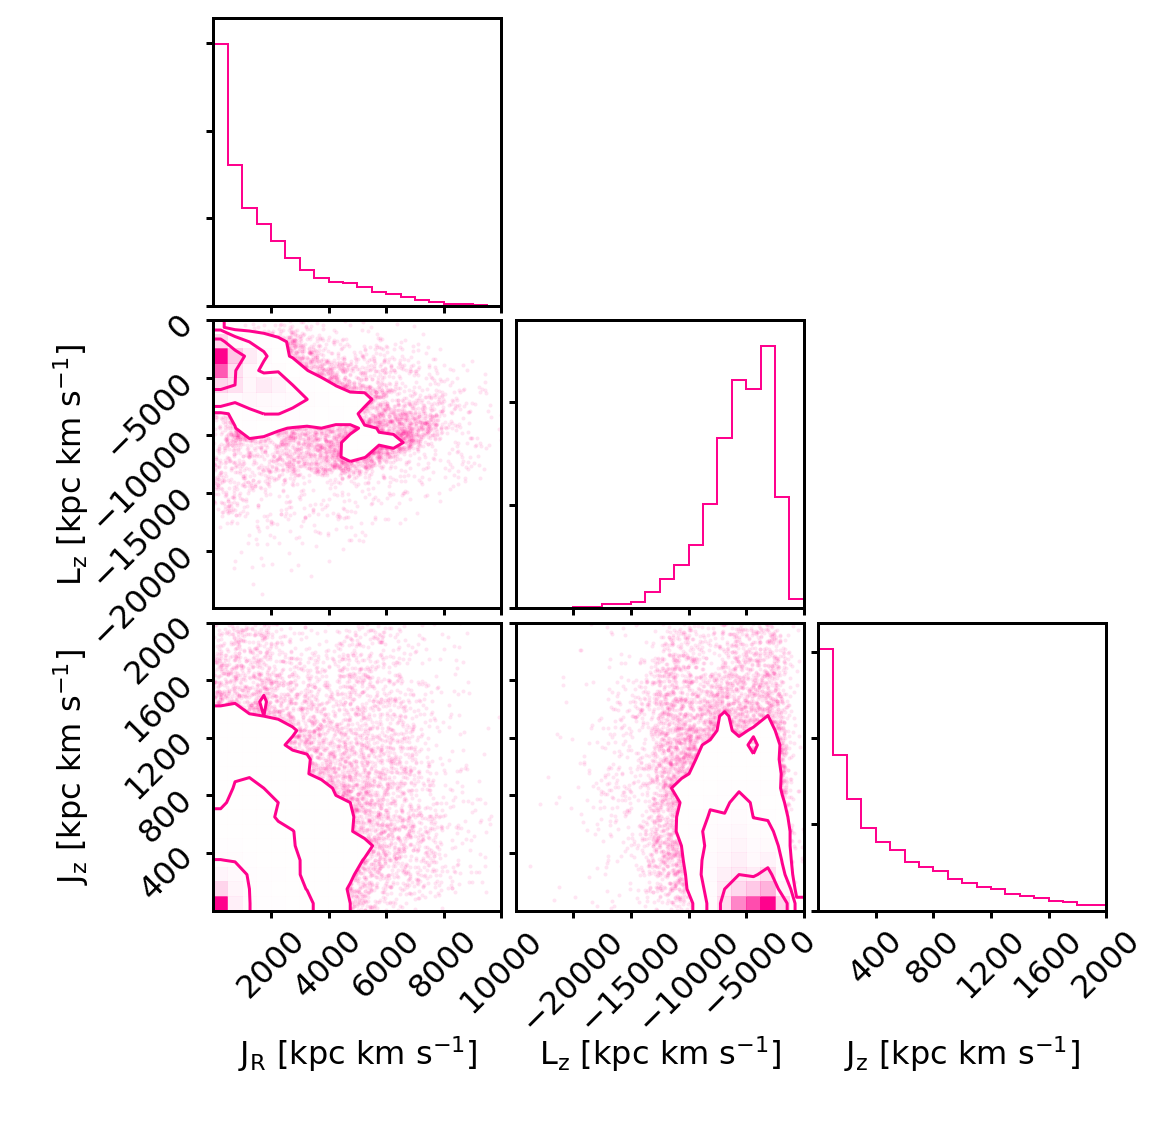

level   : 4
halo    : 24
snapnr  : 119
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1717424 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023062470555305484
redshift: 0.09940180263022191
time    : 0.9095855560793044
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9967264493518566.
17:14:07.293394
0
17:15:06.748242
1000
17:16:07.168540
2000
17:17:08.337640
3000
17:18:09.232316
4000
17:18:58.431985
5000
17:19:57.536249
6000
17:20:57.361366
7000
17:21:57.672593
8000
17:22:55.763052
9000
17:23:59.054092
10000
17:24:53.663786
11000
17:25:47.577729
12000
17:26:47.230100
13000
17:27:19.775186
14000
17:28:21.400027
15000
17:29:20.145687
16000
17:30:20.844493
17000
17:31:05.647905
18000
17:32:02.172312
19000
17:32:56.120860
20000
17:33:50.943314
21000
17:34:46.956935
22000
17:35:33.651249
23000
17:36:27.961437

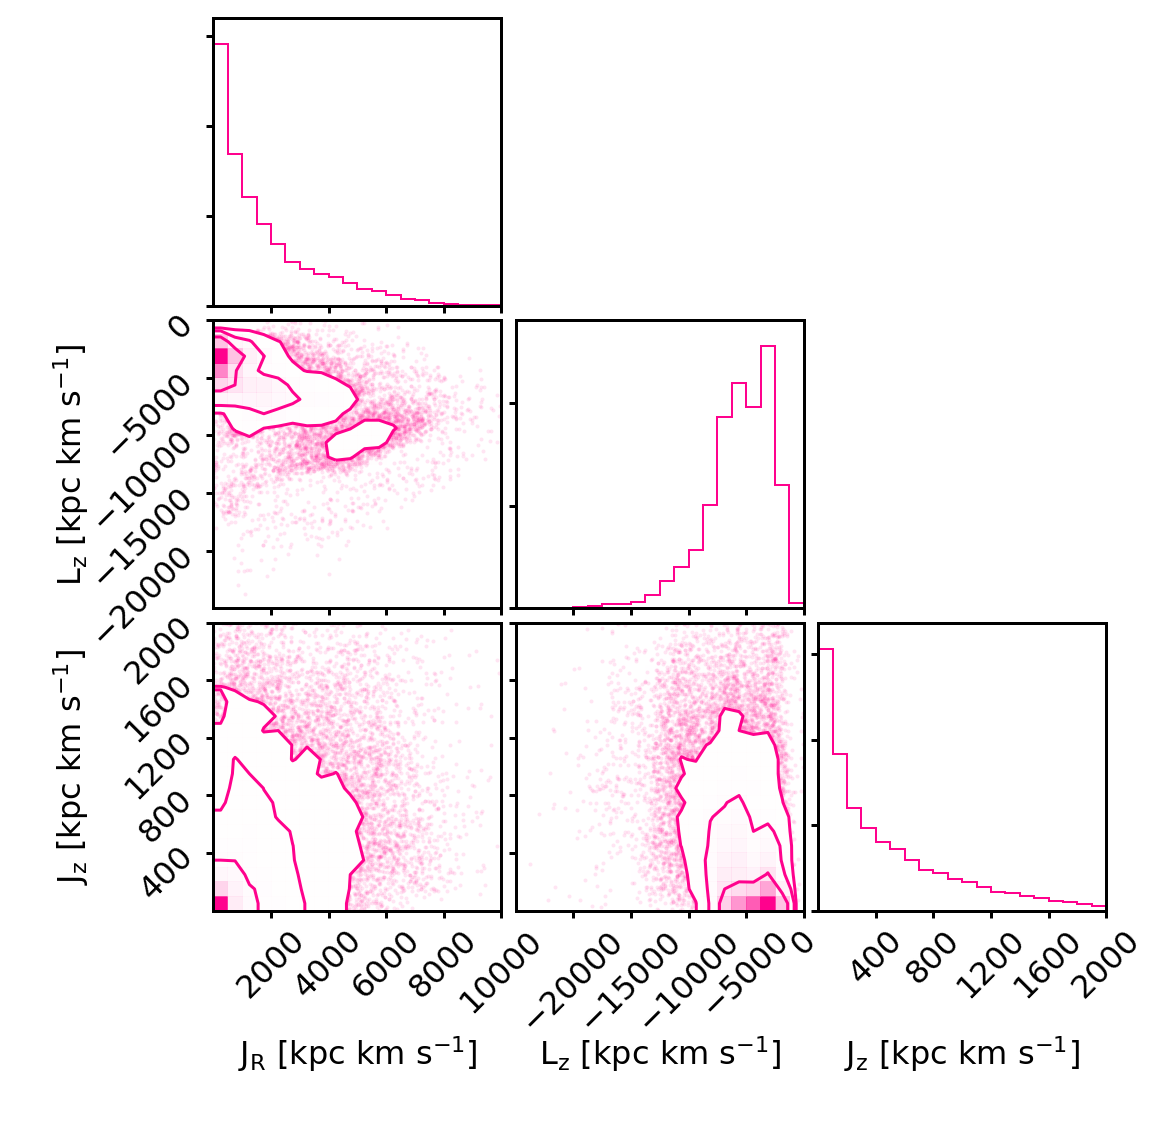

level   : 4
halo    : 24
snapnr  : 118
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1704816 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023015499114990234
redshift: 0.10986994045882548
time    : 0.9010064725120812
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9965390236093659.
17:37:49.038080
0
17:38:46.994900
1000
17:39:46.413006
2000
17:40:45.461925
3000
17:41:43.999778
4000
17:42:45.326337
5000
17:43:26.364294
6000
17:44:14.517670
7000
17:45:09.628246
8000
17:46:05.402163
9000
17:47:05.520999
10000
17:47:58.658123
11000
17:48:44.169103
12000
17:49:38.800956
13000
17:50:19.540214
14000
17:51:11.770471
15000
17:52:05.600136
16000
17:53:04.054696
17000
17:54:01.177168
18000
17:55:01.219482
19000
17:56:02.332592
20000
17:56:55.282957
21000
17:57:52.325760
22000
17:58:48.401403
23000
17:59:45.642234

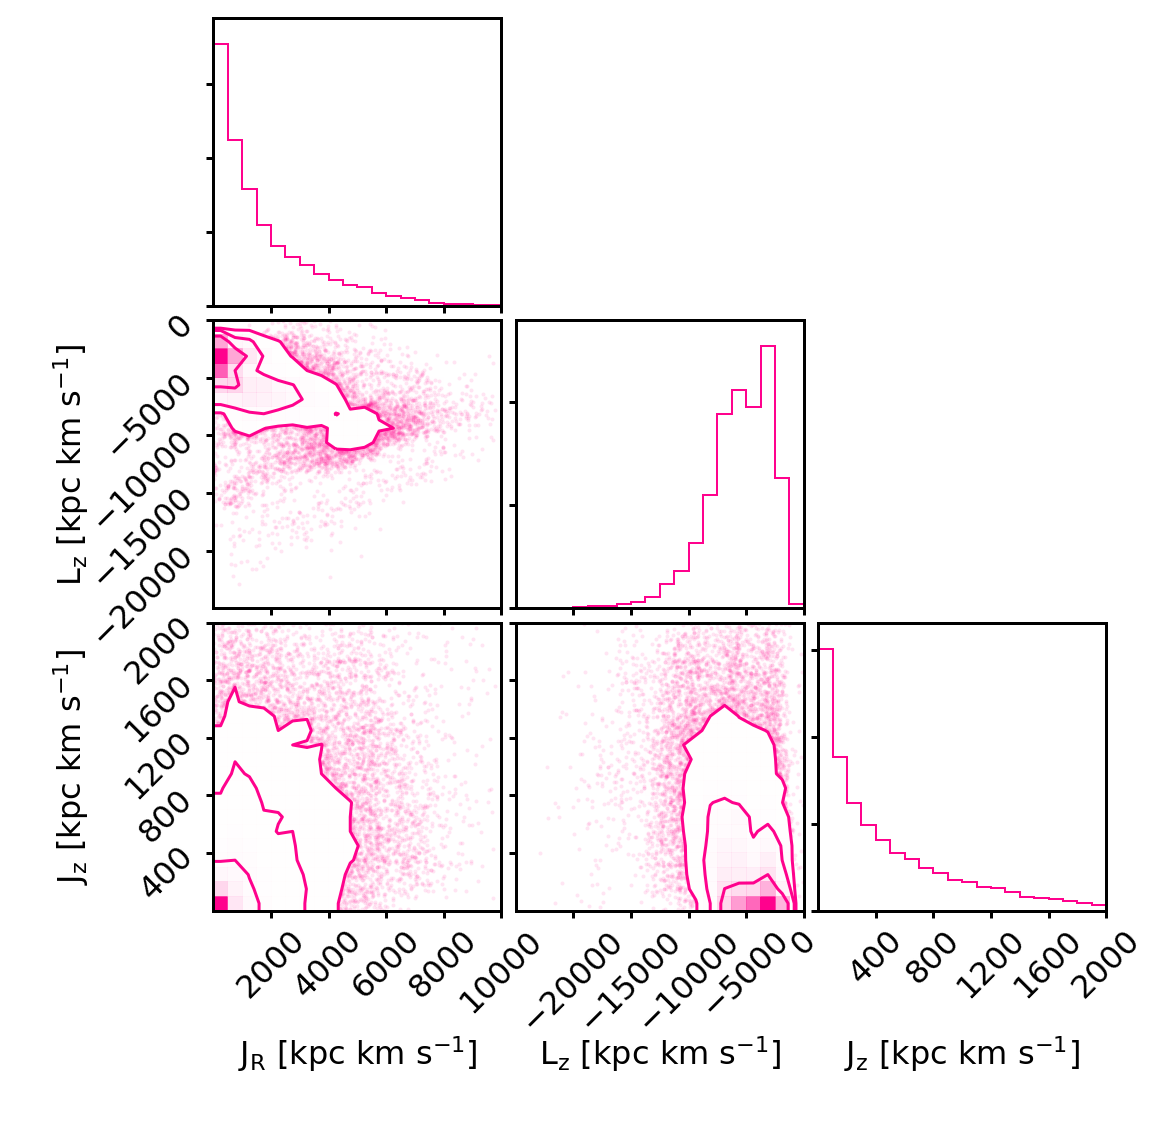

level   : 4
halo    : 24
snapnr  : 117
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1709507 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023094582557678225
redshift: 0.12575933241126092
time    : 0.8882893272206793
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9964090357331209.
18:01:08.972588
0
18:02:07.363641
1000
18:02:57.166971
2000
18:03:59.882576
3000
18:05:03.347978
4000
18:06:01.464816
5000
18:06:57.323740
6000
18:07:53.433356
7000
18:08:49.101304
8000
18:09:22.228098
9000
18:10:04.865767
10000
18:11:00.032938
11000
18:12:00.187071
12000
18:12:59.061662
13000
18:13:53.964337
14000
18:14:50.333371
15000
18:15:35.003361
16000
18:16:29.633804
17000
18:17:21.431381
18000
18:18:13.128969
19000
18:19:06.808102
20000
18:20:00.473508
21000
18:20:57.789497
22000
18:21:59.517285
23000
18:22:45.969610

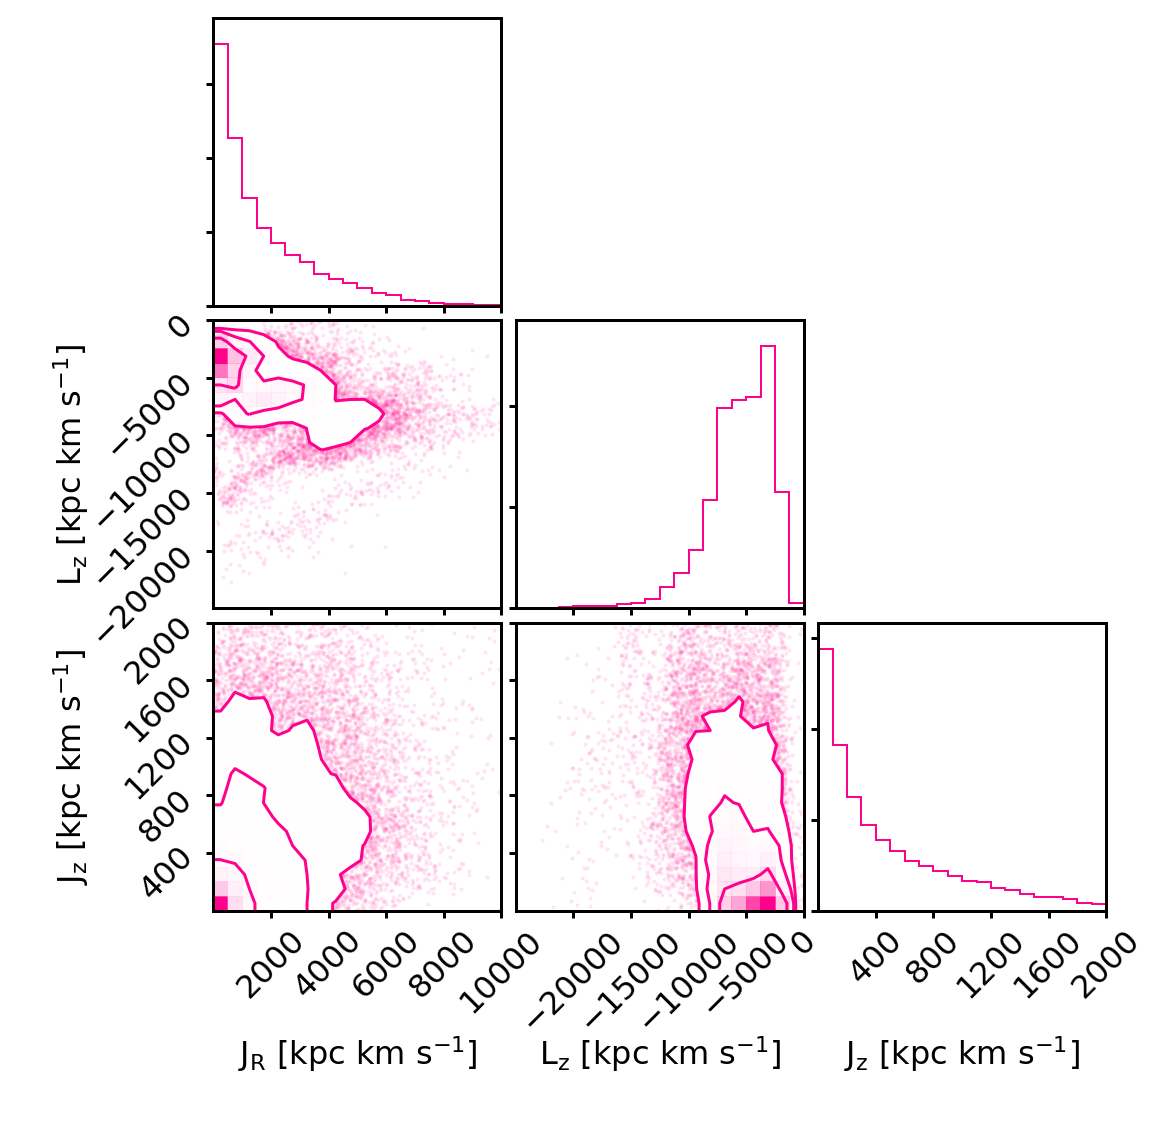

level   : 4
halo    : 24
snapnr  : 116
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1690508 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023121218383312228
redshift: 0.14187620396956202
time    : 0.8757516765159388
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.996460893514413.
18:24:08.579634
0
18:25:03.857184
1000
18:25:57.866552
2000
18:26:48.814277
3000
18:27:36.856090
4000
18:28:08.862705
5000
18:28:45.014234
6000
18:29:22.275723
7000
18:30:11.087128
8000
18:30:55.491897
9000
18:31:54.870358
10000
18:32:46.489935
11000
18:33:26.537847
12000
18:34:19.189952
13000
18:35:07.041349
14000
18:35:50.355849
15000
18:36:47.712525
16000
18:37:43.322383
17000
18:38:39.432783
18000
18:39:36.667402
19000
18:40:32.755621
20000
18:41:29.741985
21000
18:42:19.422495
22000
18:43:15.290473
23000
18:44:11.698411


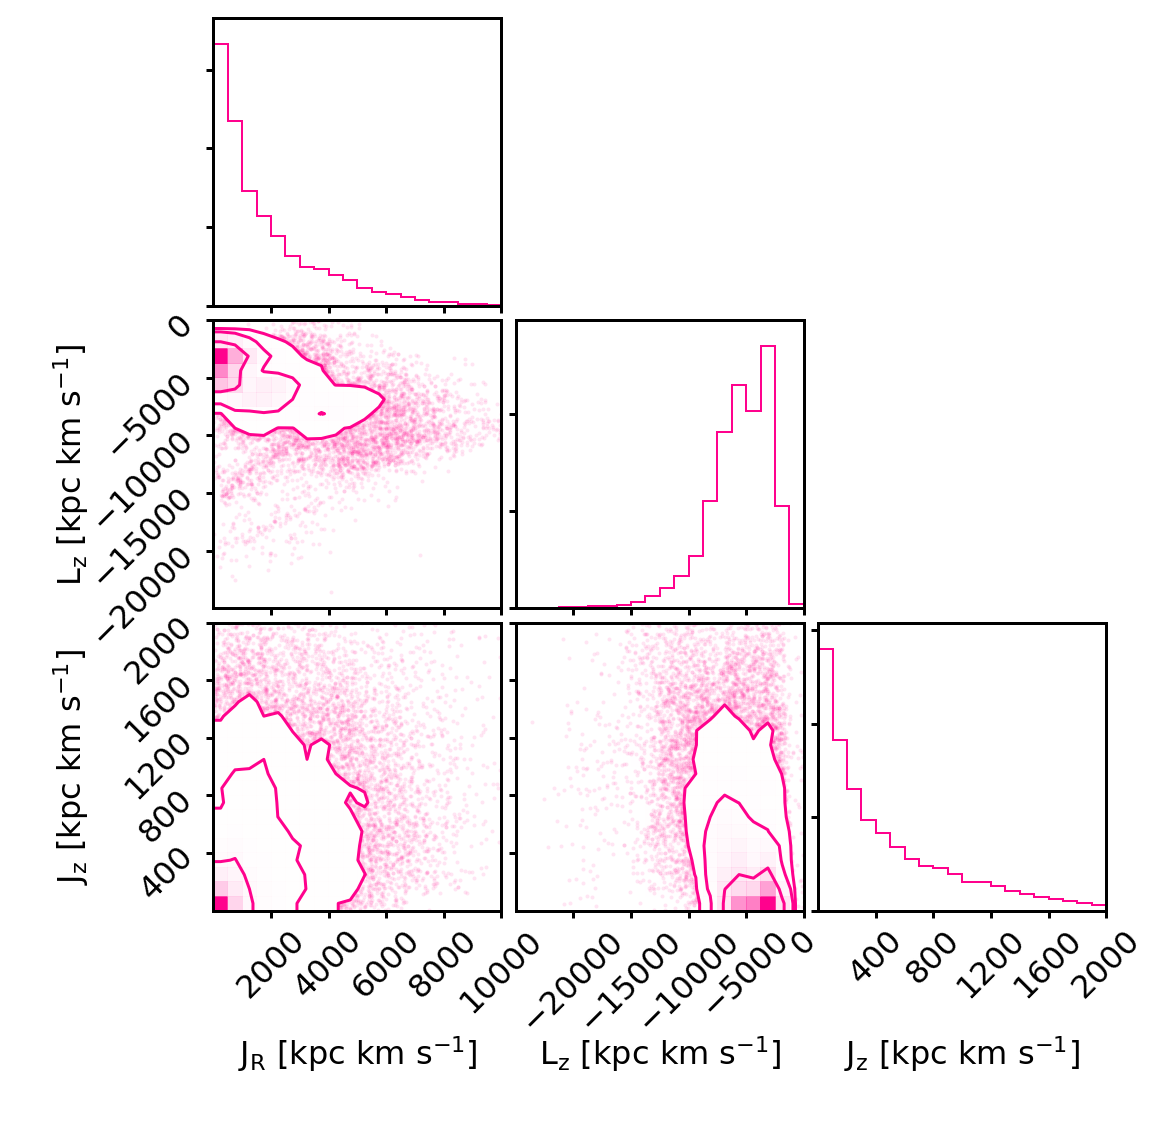

level   : 4
halo    : 24
snapnr  : 115
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1689680 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023059283196926118
redshift: 0.15274876890238098
time    : 0.8674917093619414
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9965922036456221.
18:45:33.633647
0
18:46:29.807080
1000
18:47:24.154098
2000
18:48:17.664195
3000
18:49:07.277946
4000
18:49:42.861416
5000
18:50:21.672932
6000
18:51:10.499875
7000
18:51:53.477023
8000
18:52:30.755589
9000
18:53:20.782813
10000
18:54:12.350363
11000
18:55:02.556665
12000
18:55:41.032514
13000
18:56:29.998797
14000
18:57:18.338793
15000
18:58:01.952807
16000
18:58:57.724275
17000
18:59:54.270349
18000
19:00:52.724049
19000
19:01:53.869755
20000
19:02:37.063813
21000
19:03:29.732754
22000
19:04:21.117097
23000
19:05:08.258666

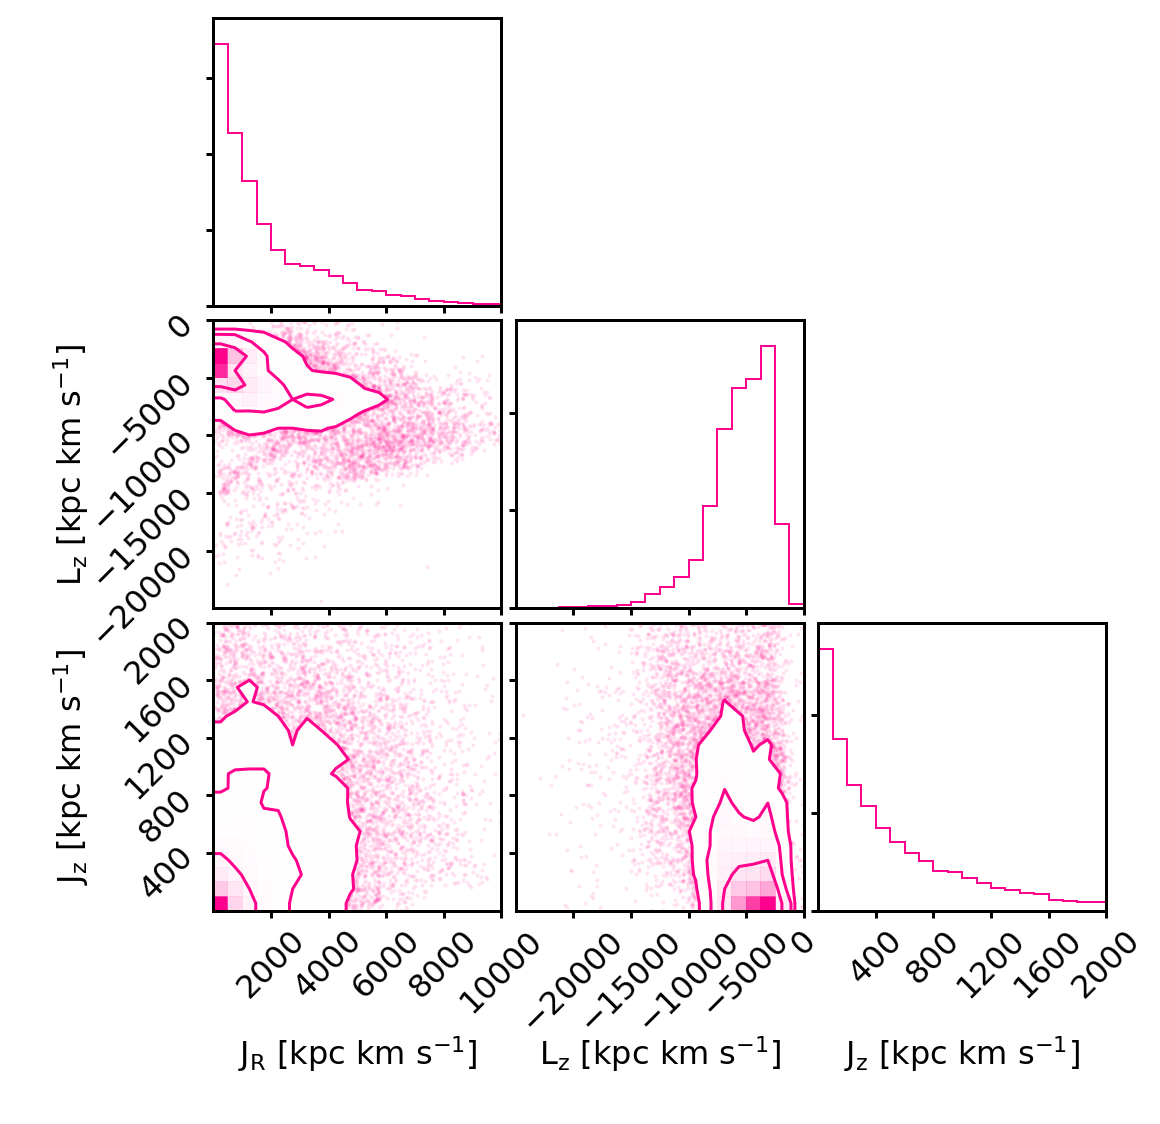

level   : 4
halo    : 24
snapnr  : 114
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1680675 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02292117774486542
redshift: 0.1692520332436107
time    : 0.8552476040823377
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9969214094332757.
19:06:25.044364
0
19:07:21.879642
1000
19:08:17.545912
2000
19:08:56.644728
3000
19:09:46.497614
4000
19:10:32.849598
5000
19:11:20.843569
6000
19:12:11.707292
7000
19:13:05.469067
8000
19:13:41.055523
9000
19:14:41.298378
10000
19:15:28.253335
11000
19:16:26.536148
12000
19:17:24.668323
13000
19:18:24.884390
14000
19:19:25.160691
15000
19:20:26.118766
16000
19:21:25.132547
17000
19:22:16.041500
18000
19:23:15.284572
19000
19:24:12.670025
20000
19:25:10.376627
21000
19:26:07.875112
22000
19:27:06.906756
23000
19:27:55.217856
2

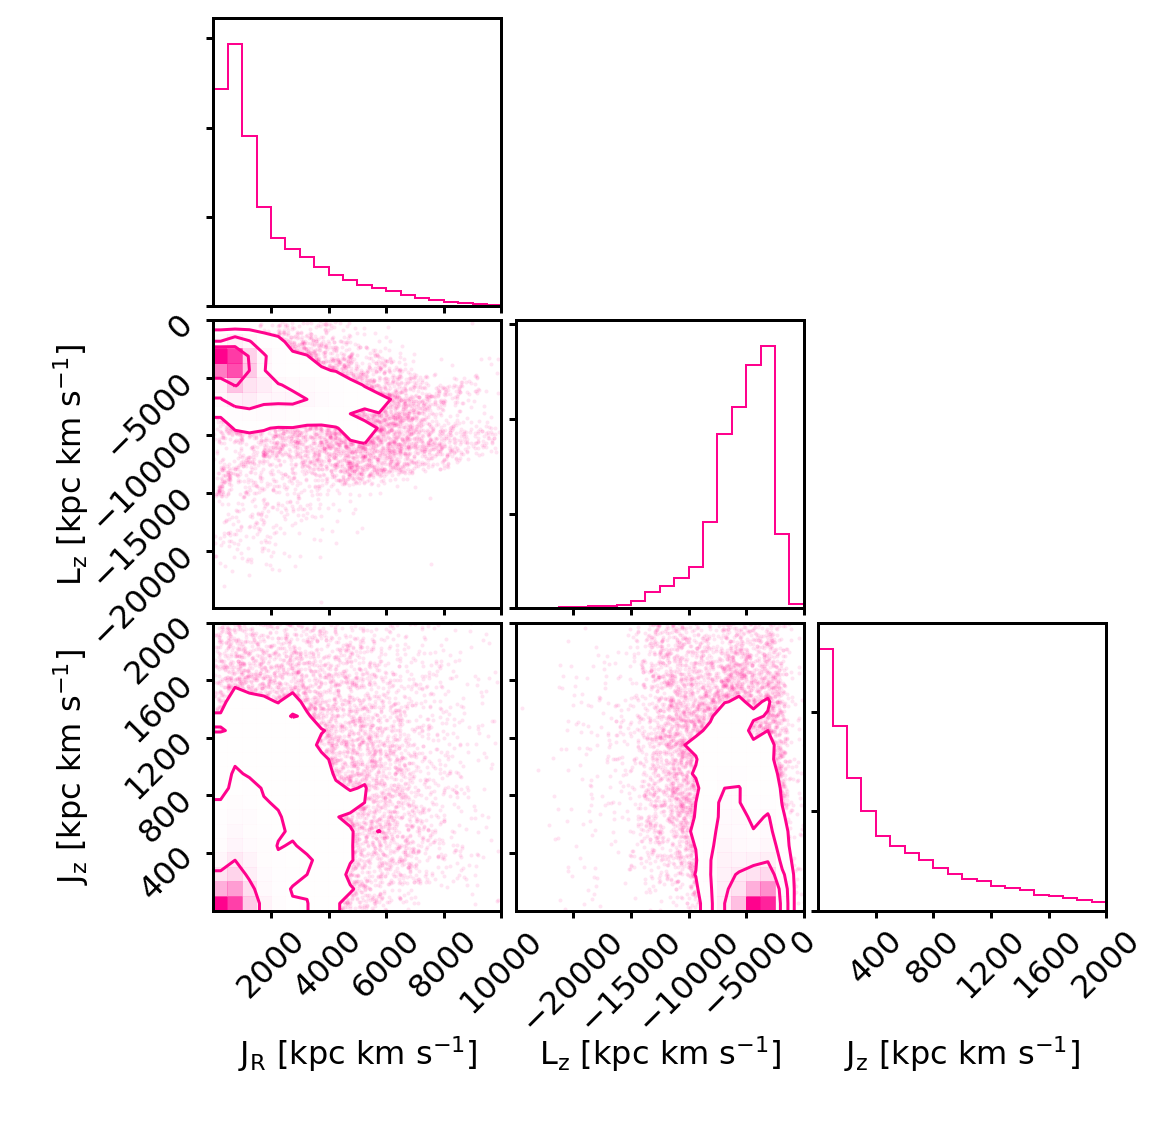

level   : 4
halo    : 24
snapnr  : 113
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1636296 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022813534736633303
redshift: 0.1803852617057493
time    : 0.8471810284677068
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9972187156975711.
19:29:13.562458
0
19:30:11.656708
1000
19:31:14.450163
2000
19:32:16.422088
3000
19:33:17.864117
4000
19:34:10.708032
5000
19:34:55.209591
6000
19:35:41.392918
7000
19:36:31.866963
8000
19:37:31.582926
9000
19:38:35.922179
10000
19:39:31.325386
11000
19:40:30.246498
12000
19:41:34.360194
13000
19:42:38.486858
14000
19:43:40.949620
15000
19:44:43.585714
16000
19:45:37.152250
17000
19:46:39.872440
18000
19:47:43.671939
19000
19:48:44.968705
20000
19:49:49.918553
21000
19:50:47.824237
22000
19:51:45.552527
23000
19:52:48.219936


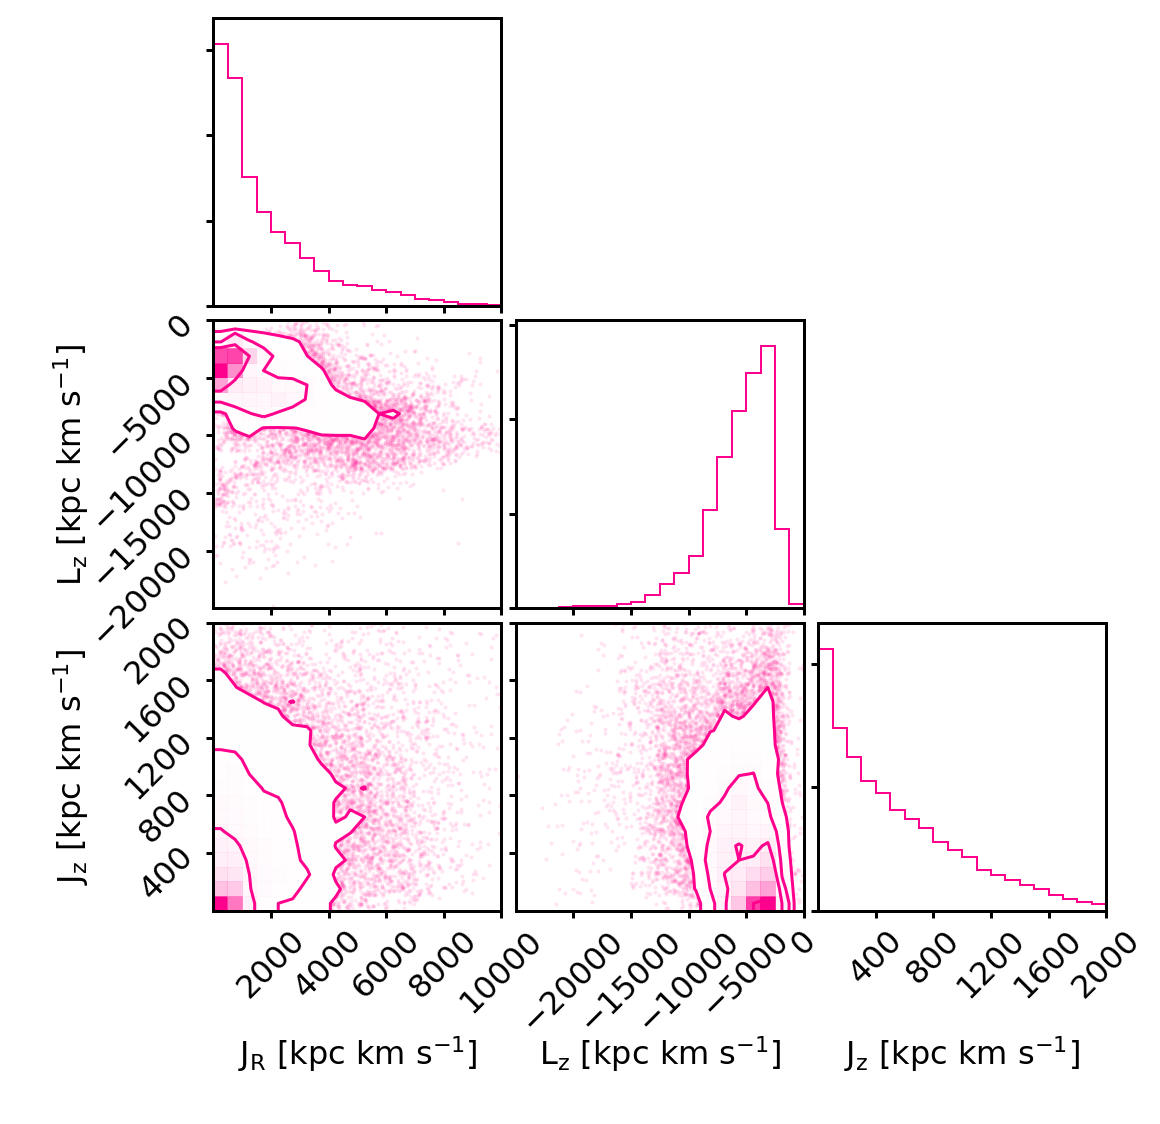

level   : 4
halo    : 24
snapnr  : 112
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1681756 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022649659216403963
redshift: 0.19728418237600986
time    : 0.8352235958012078
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9977599482621657.
19:54:13.598805
0
19:55:16.151992
1000
19:56:18.696845
2000
19:57:12.471540
3000
19:57:54.115744
4000
19:58:57.698378
5000
20:00:03.519648
6000
20:01:08.592041
7000
20:02:03.285027
8000
20:03:07.665170
9000
20:04:13.292993
10000
20:05:19.841986
11000
20:06:26.687342
12000
20:07:21.741794
13000
20:08:24.932216
14000
20:09:26.337574
15000
20:10:26.349624
16000
20:11:27.742220
17000
20:12:29.641170
18000
20:13:34.772840
19000
20:14:27.500838
20000
20:15:28.867007
21000
20:16:24.676721
22000
20:17:20.001803
23000
20:18:11.398830

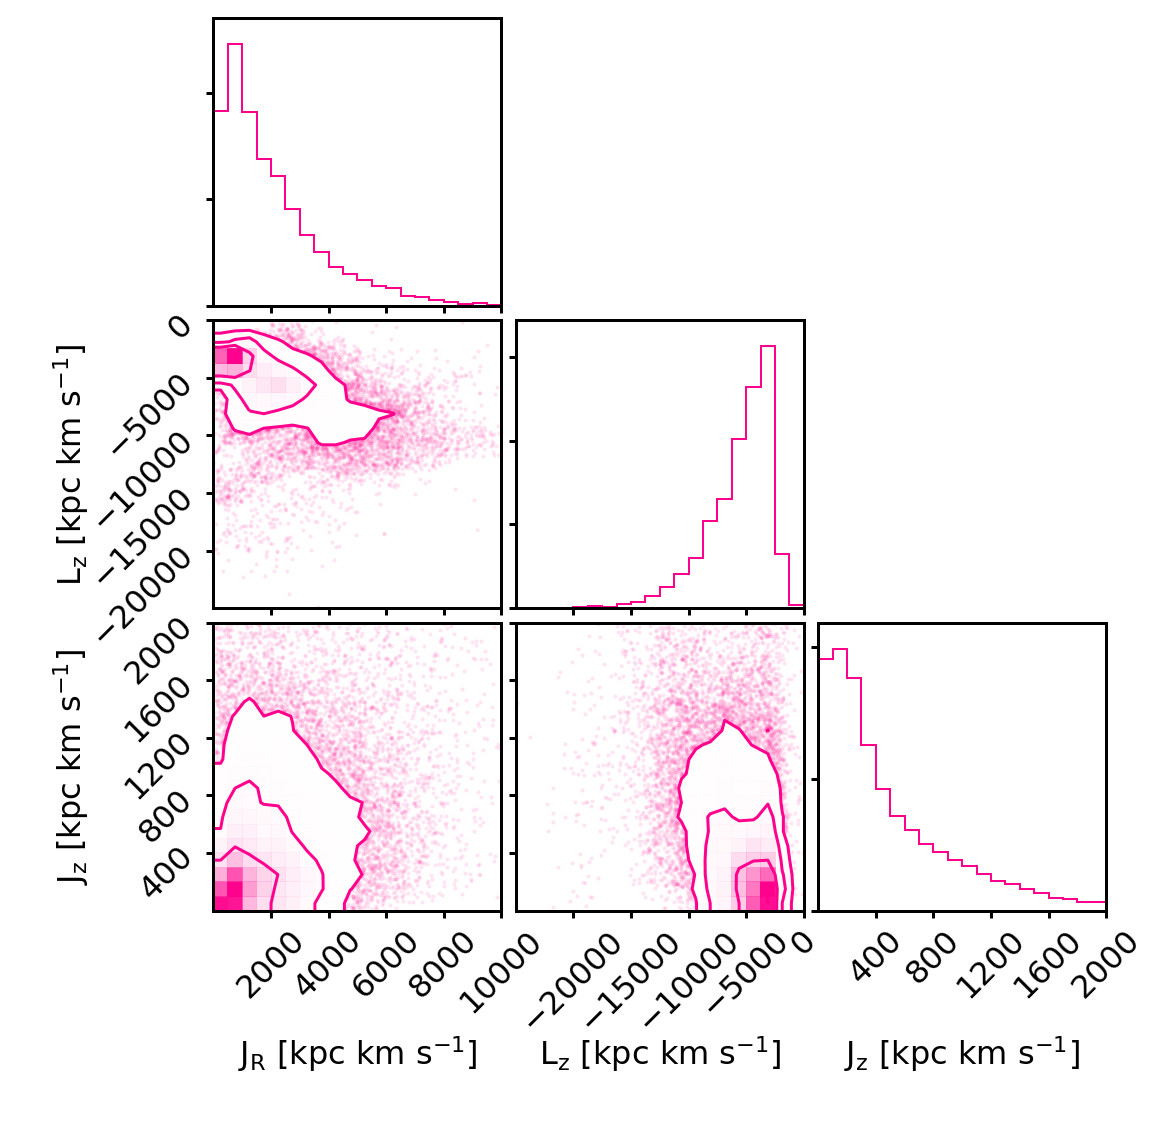

level   : 4
halo    : 24
snapnr  : 111
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1611388 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02241901010274887
redshift: 0.21442503551449454
time    : 0.823434934850752
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9983861399398812.
20:19:08.874067
0
20:19:55.538704
1000
20:20:43.478299
2000
20:21:39.677040
3000
20:22:35.856386
4000
20:23:31.710795
5000
20:24:27.224548
6000
20:25:23.587546
7000
20:26:20.459031
8000
20:27:09.920036
9000
20:28:07.860153
10000
20:29:09.197861
11000
20:30:11.024533
12000
20:31:12.425048
13000
20:32:13.928351
14000
20:33:07.002811
15000
20:34:06.501057
16000
20:35:03.114251
17000
20:35:58.544829
18000
20:36:54.550846
19000
20:37:50.716233
20000
20:38:46.798566
21000
20:39:35.926287
22000
20:40:16.154685
23000
20:41:04.898061
2

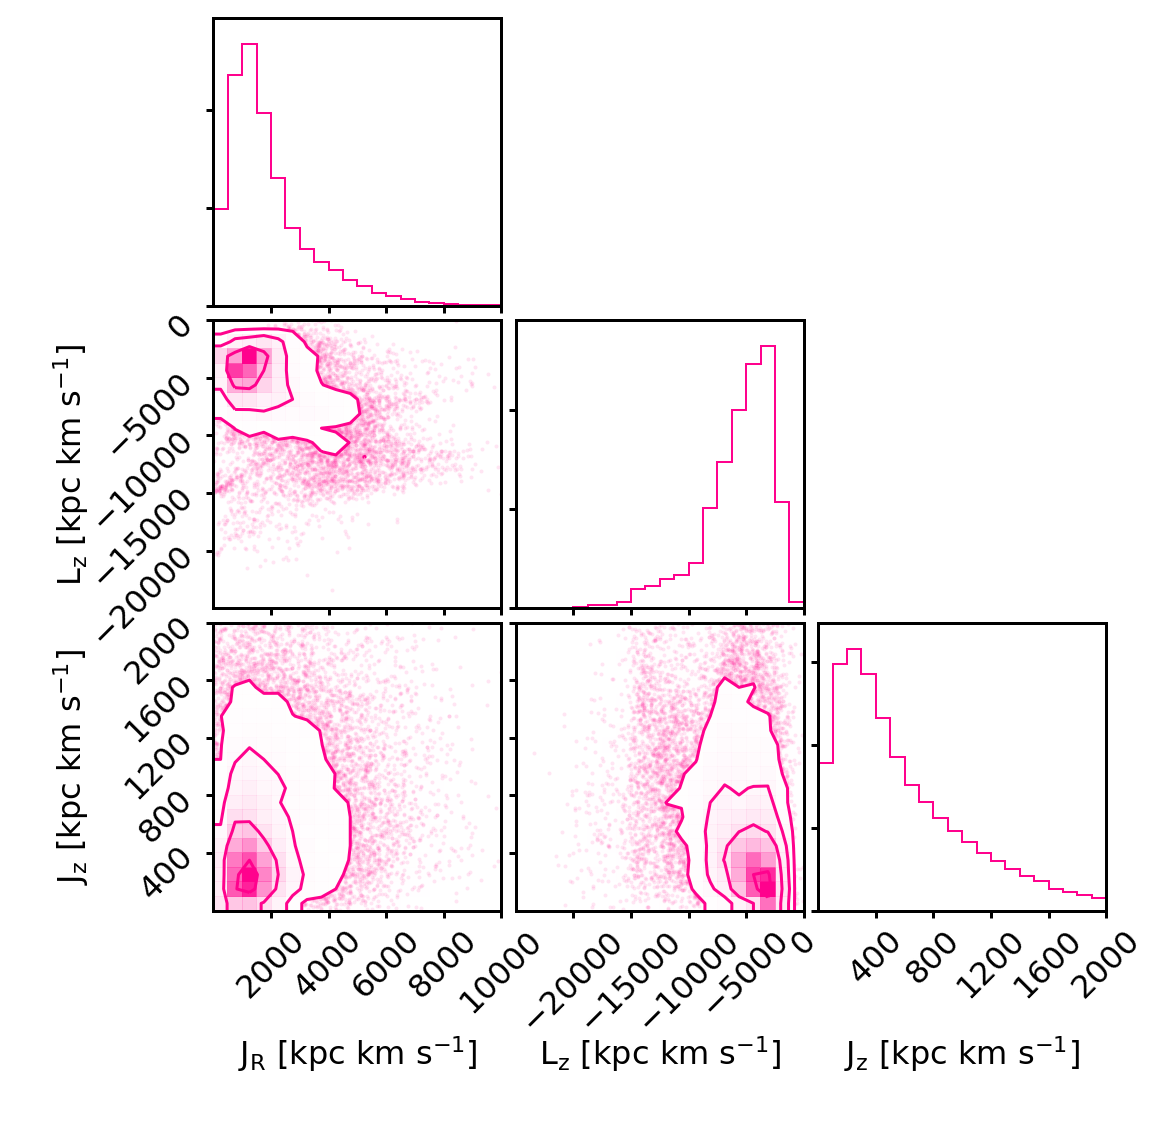

level   : 4
halo    : 24
snapnr  : 110
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1596516 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022285720705986025
redshift: 0.22598838626019768
time    : 0.8156684118765909
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9988333667154161.
20:42:20.192646
0
20:43:15.810857
1000
20:44:11.951664
2000
20:45:08.001085
3000
20:45:59.458563
4000
20:46:58.227349
5000
20:48:01.908926
6000
20:49:06.550123
7000
20:50:09.865567
8000
20:51:07.474943
9000
20:52:03.056597
10000
20:53:05.695222
11000
20:54:08.015591
12000
20:55:10.429318
13000
20:56:11.632082
14000
20:57:07.249878
15000
20:58:03.532369
16000
20:59:05.855355
17000
21:00:12.042100
18000
21:01:18.014102
19000
21:02:08.000201
20000
21:02:47.217977
21000
21:03:36.744851
22000
21:04:34.419403
23000
21:05:35.817707

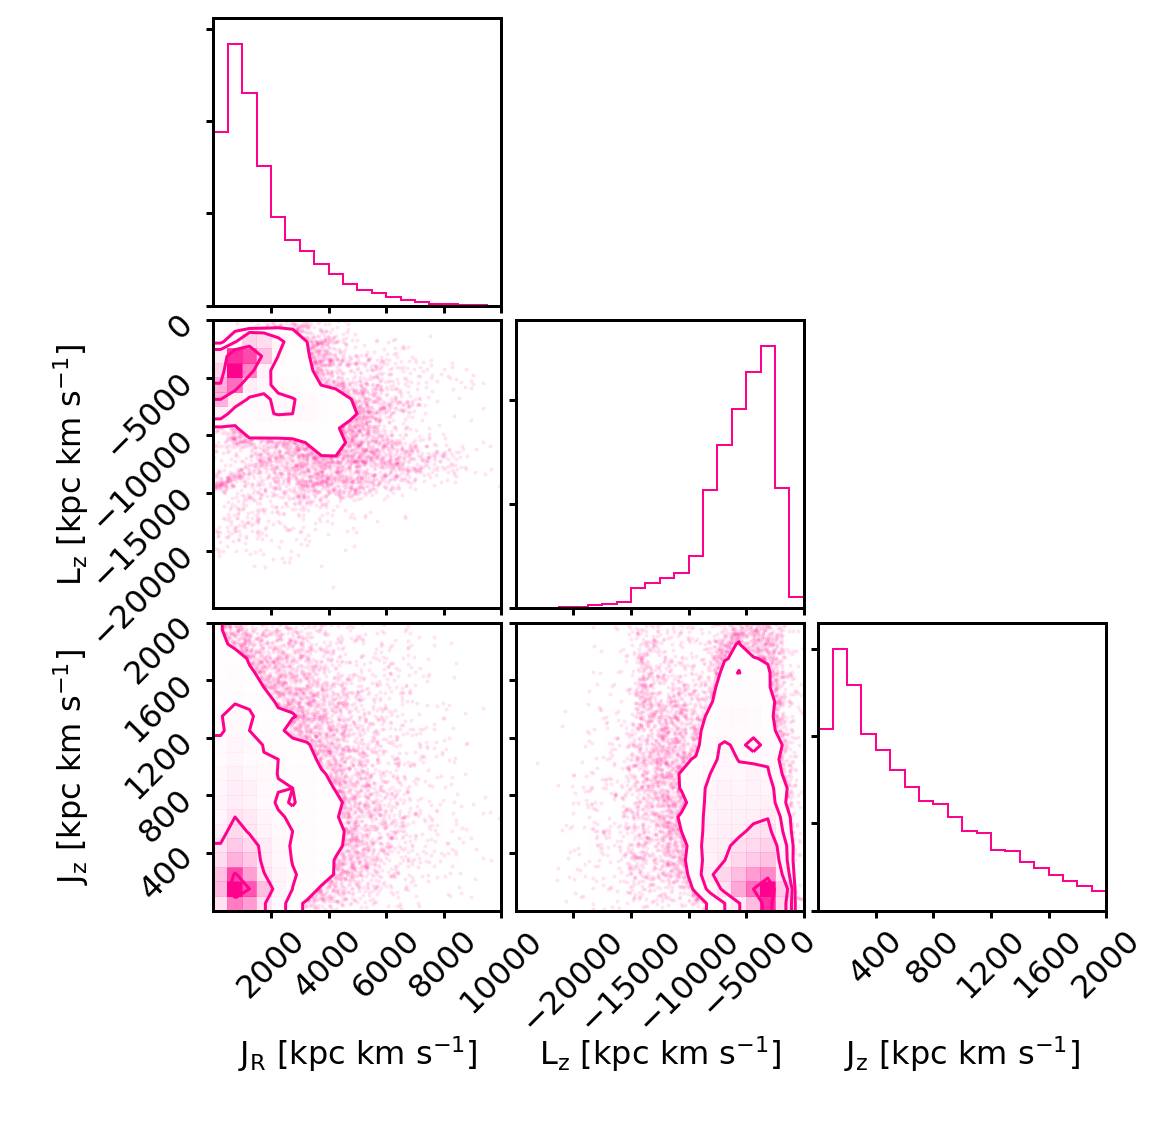

level   : 4
halo    : 24
snapnr  : 109
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1597012 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022122310101985933
redshift: 0.24354018155467028
time    : 0.8041557601699713
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9995219643591322.
21:06:59.394233
0
21:08:04.198975
1000
21:09:07.018461
2000
21:10:09.117107
3000
21:11:17.037982
4000
21:12:21.871608
5000
21:13:28.808161
6000
21:14:33.337697
7000
21:15:27.181092
8000
21:16:29.478319
9000
21:17:32.644578
10000
21:18:37.569237
11000
21:19:40.301206
12000
21:20:36.152889
13000
21:21:29.144303
14000
21:22:28.317100
15000
21:23:28.241652
16000
21:24:25.570027
17000
21:25:09.480996
18000
21:26:04.594366
19000
21:26:53.714515
20000
21:27:51.200006
21000
21:28:46.109784
22000
21:29:45.770620
23000
21:30:43.838798

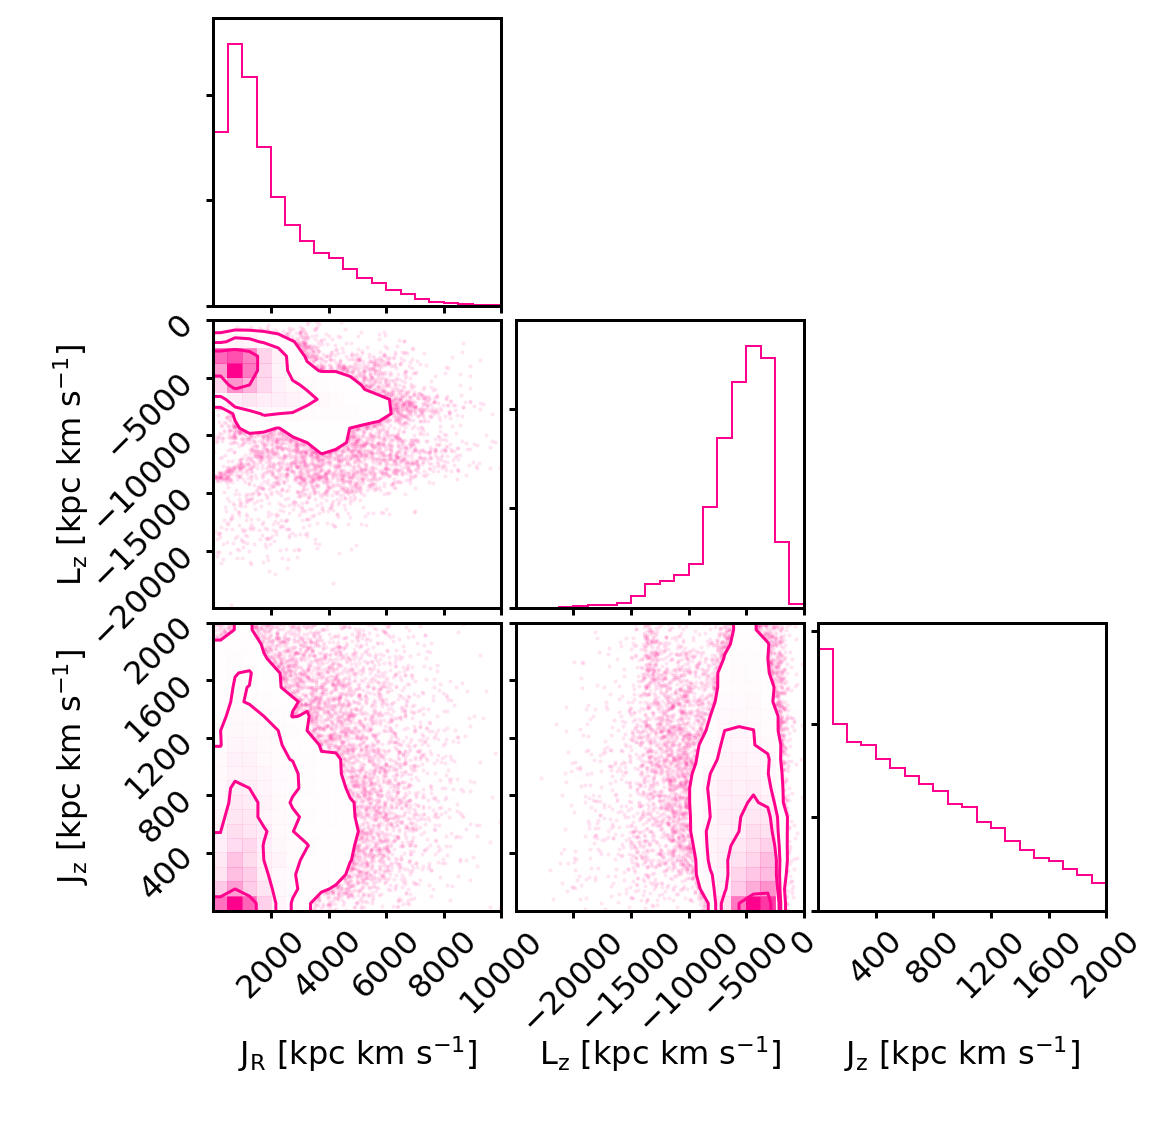

level   : 4
halo    : 24
snapnr  : 108
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1625123 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02170633673667908
redshift: 0.2613432561610123
time    : 0.7928056023731169
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0002000482244986.
21:32:07.297047
0
21:32:57.333328
1000
21:33:55.834417
2000
21:34:56.567821
3000
21:35:57.596345
4000
21:36:58.032888
5000
21:37:57.630483
6000
21:38:56.932748
7000
21:39:44.310595
8000
21:40:42.328255
9000
21:41:42.142881
10000
21:42:41.014148
11000
21:43:37.641553
12000
21:44:32.759244
13000
21:45:21.046488
14000
21:45:48.238486
15000
21:46:22.977464
16000
21:46:55.049678
17000
21:47:28.329252
18000
21:48:36.146773
19000
21:49:16.845850
20000
21:49:52.000041
21000
21:50:28.745244
22000
21:51:04.198152
23000
21:51:38.003866
2

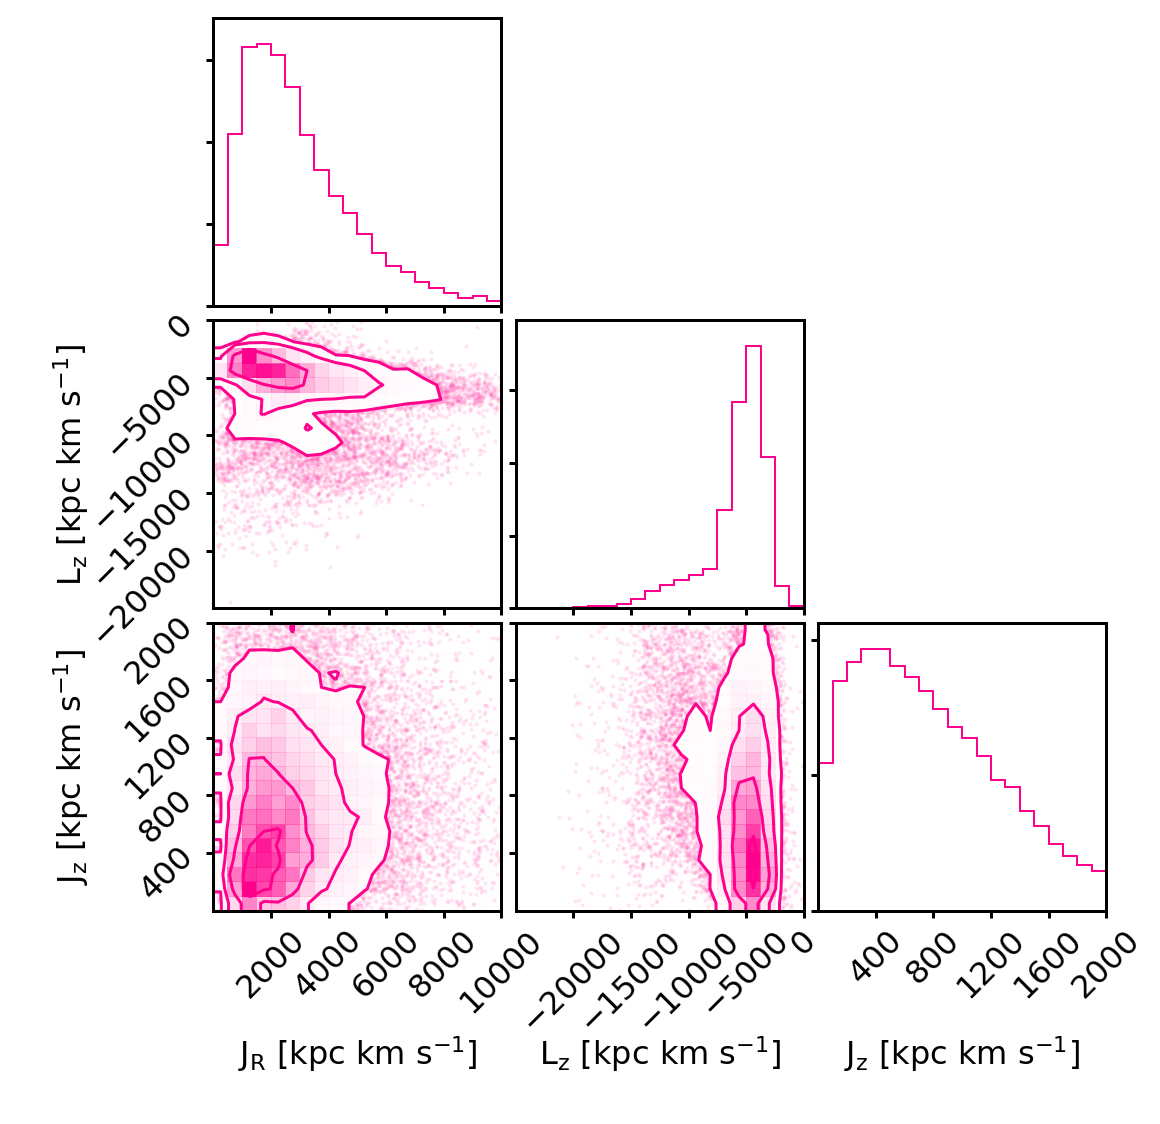

level   : 4
halo    : 24
snapnr  : 107
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1562371 stars.
Rotated pos.
Rotated vel.

galrad  : 0.021586434543132783
redshift: 0.2733533465784399
time    : 0.7853279709729014
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0006293778437656.
21:52:41.549088
0
21:53:16.636600
1000
21:53:51.374868
2000
21:54:24.615230
3000
21:55:16.022330
4000
21:56:31.289467
5000
21:57:48.520096
6000
21:59:04.626260
7000
22:00:27.425819
8000
22:03:26.282513
9000
22:06:21.820977
10000
22:08:42.000244
11000
22:09:21.993476
12000
22:10:18.561881
13000
22:11:14.517803
14000
22:12:08.680397
15000
22:13:04.132338
16000
22:13:57.206567
17000
22:14:53.992697
18000
22:15:49.875234
19000
22:16:44.781789
20000
22:17:40.282305
21000
22:18:23.136646
22000
22:18:51.802815
23000
22:19:19.882551


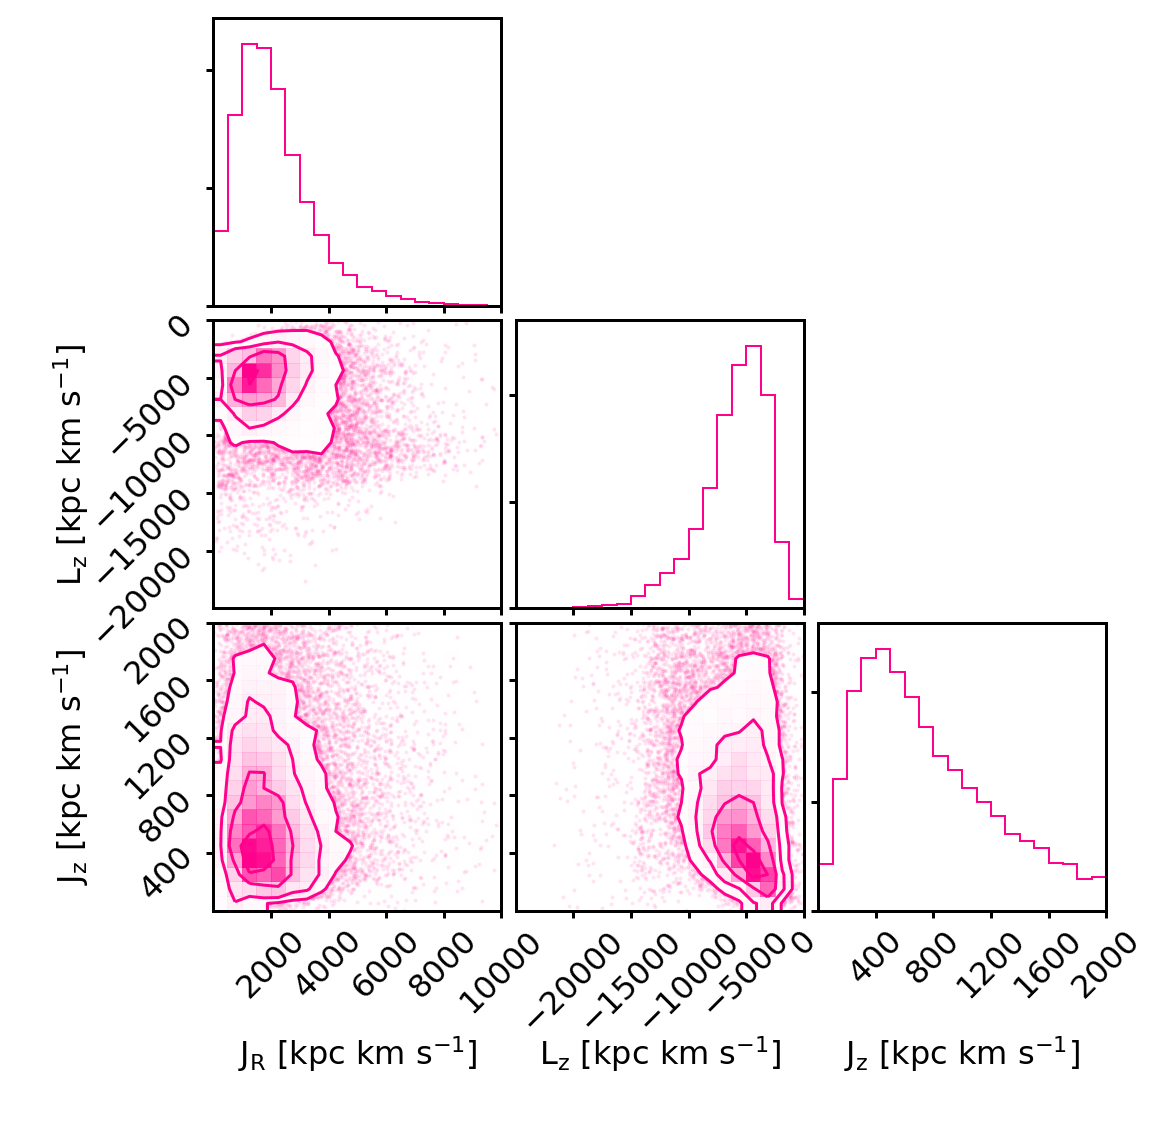

level   : 4
halo    : 24
snapnr  : 106
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1553881 stars.
Rotated pos.
Rotated vel.

galrad  : 0.0215757355093956
redshift: 0.29158323972192446
time    : 0.7742435556962617
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.001216087145605.
22:20:17.637411
0
22:20:51.064925
1000
22:21:19.589930
2000
22:21:48.583200
3000
22:22:23.841119
4000
22:23:16.719934
5000
22:23:46.186869
6000
22:24:16.722340
7000
22:24:46.274395
8000
22:25:12.960403
9000
22:25:42.411060
10000
22:26:11.524805
11000
22:26:39.203778
12000
22:27:08.626274
13000
22:27:35.793087
14000
22:28:01.009768
15000
22:28:22.048698
16000
22:28:56.387017
17000
22:30:03.066554
18000
22:31:25.362583
19000
22:32:57.038232
20000
22:34:20.377900
21000
22:35:31.376733
22000
22:36:57.769967
23000
22:38:31.499496
24

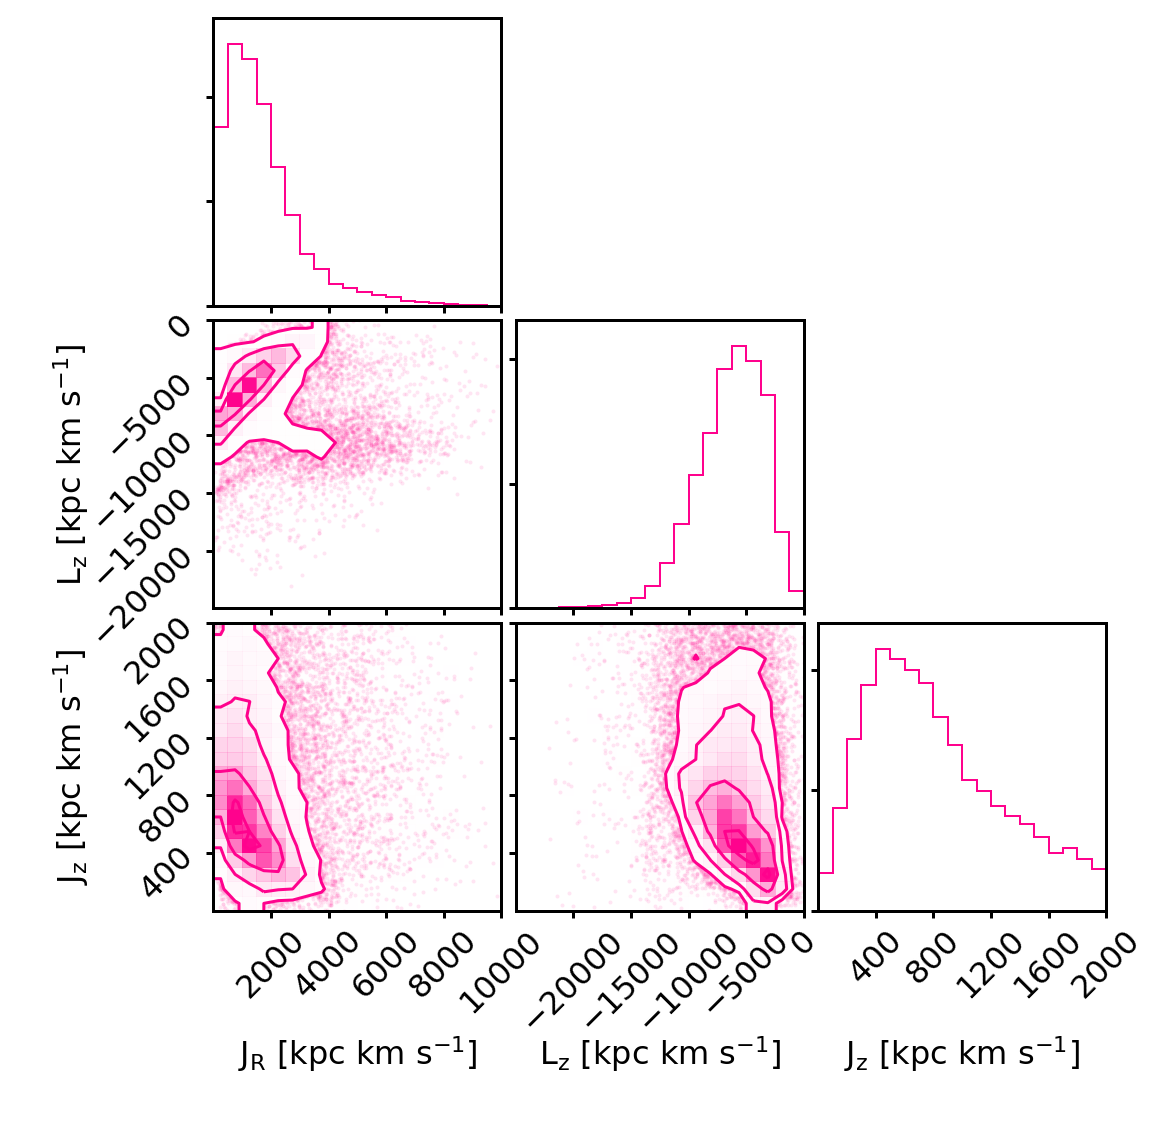

level   : 4
halo    : 24
snapnr  : 105
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1524327 stars.
Rotated pos.
Rotated vel.

galrad  : 0.021507640182971955
redshift: 0.31007412012783386
time    : 0.7633155900388464
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0017096692935015.
22:40:17.630970
0
22:41:24.466798
1000
22:42:25.085291
2000
22:43:21.338801
3000
22:44:20.582361
4000
22:45:25.589154
5000
22:46:27.184376
6000
22:47:25.547805
7000
22:48:20.172735
8000
22:49:14.883311
9000
22:50:09.264760
10000
22:51:07.391978
11000
22:52:08.858153
12000
22:53:09.712310
13000
22:54:12.836865
14000
22:55:16.154107
15000
22:56:14.190045
16000
22:57:37.495844
17000
22:58:28.039348
18000
22:59:31.934552
19000
23:00:33.043734
20000
23:01:32.018893
21000
23:02:27.594018
22000
23:03:24.591403
23000
23:04:17.642845

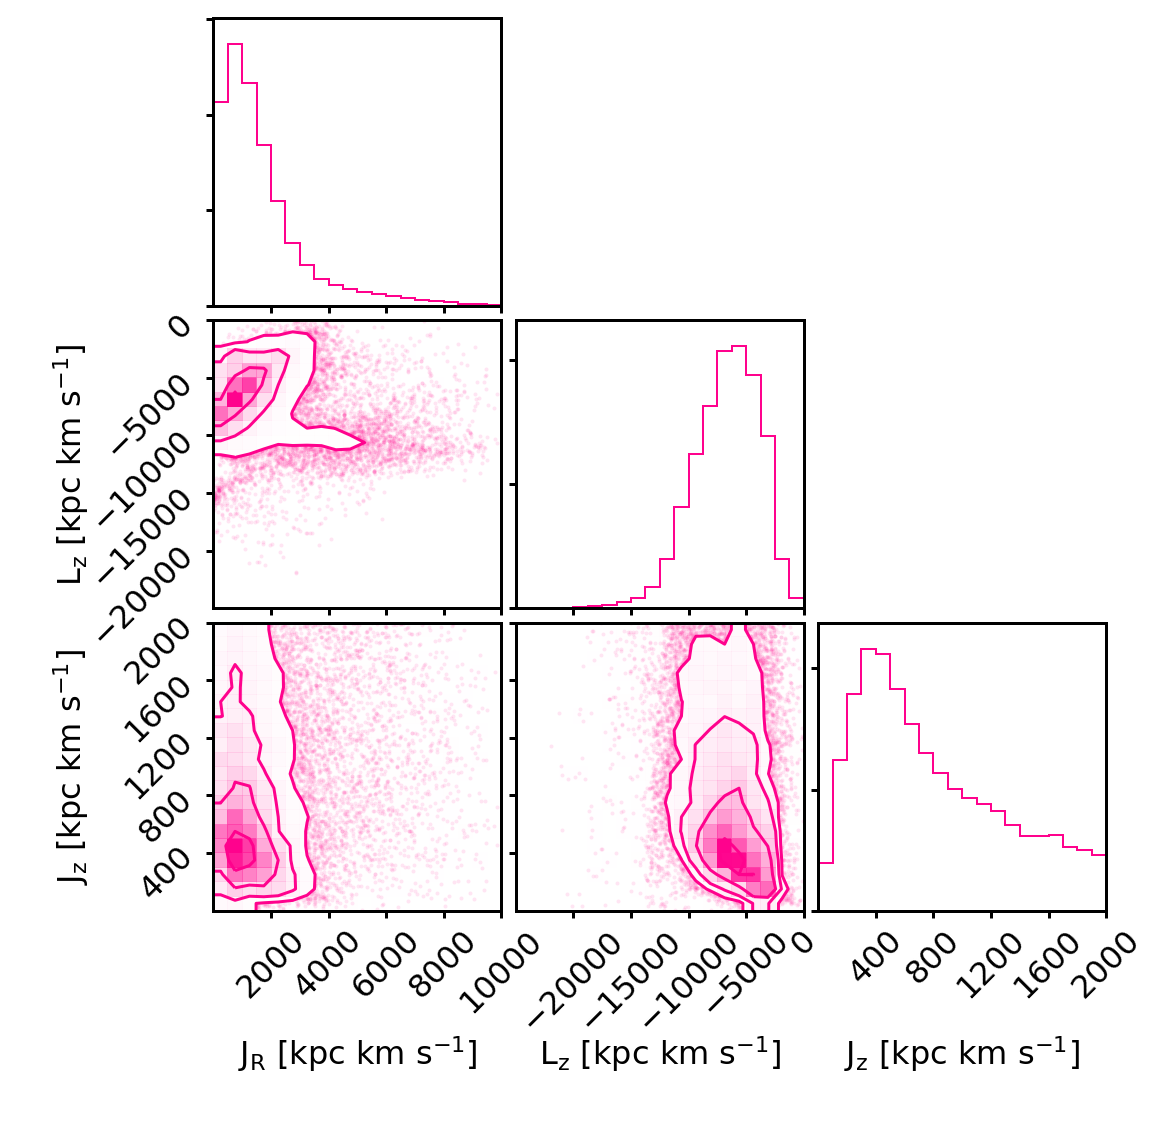

level   : 4
halo    : 24
snapnr  : 104
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1532350 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02135048806667328
redshift: 0.32882972420595435
time    : 0.7525418658117033
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.002087352036116.
23:05:39.791516
0
23:06:40.806772
1000
23:07:40.134181
2000
23:08:43.837513
3000
23:09:52.083747
4000
23:10:47.453319
5000
23:11:37.518354
6000
23:12:35.237875
7000
23:13:32.729843
8000
23:14:29.173700
9000
23:15:32.609039
10000
23:16:33.993825
11000
23:17:33.537305
12000
23:18:33.840212
13000
23:19:39.296220
14000
23:21:00.972381
15000
23:22:09.319635
16000
23:23:13.978367
17000
23:24:25.628605
18000
23:25:29.172177
19000
23:26:39.563138
20000
23:28:01.060531
21000
23:29:04.662754
22000
23:29:43.833000
23000
23:30:32.759325
2

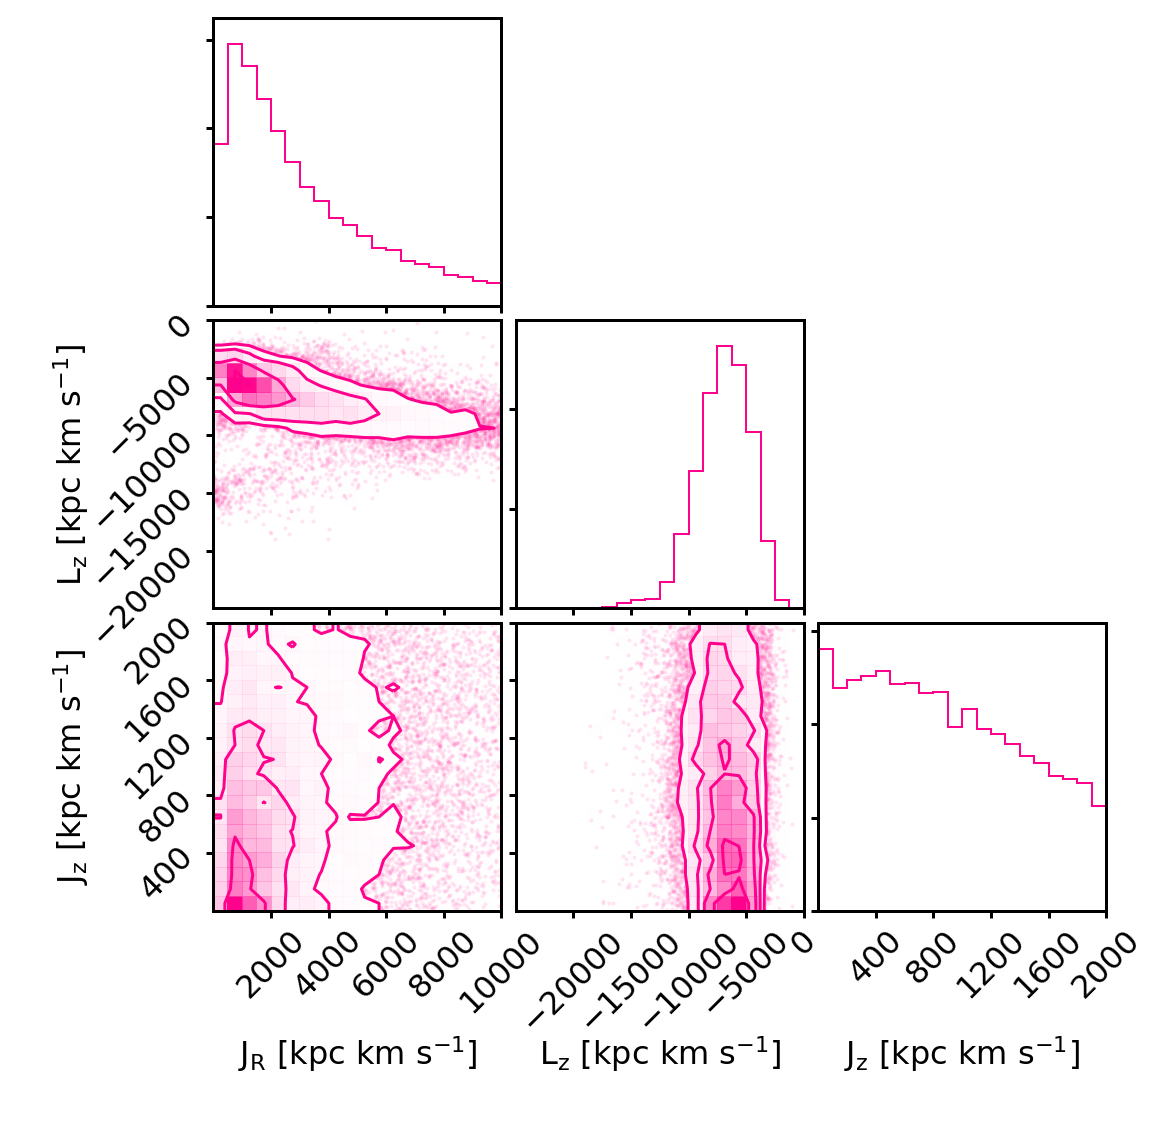

level   : 4
halo    : 24
snapnr  : 103
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1509390 stars.
Rotated pos.
Rotated vel.

galrad  : 0.021213290095329285
redshift: 0.3478538418581776
time    : 0.7419202059930923
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0023320448043997.
23:31:25.989007
0
23:31:54.657449
1000
23:33:00.108439
2000
23:33:27.723843
3000
23:33:55.596549
4000
23:34:46.871816
5000
23:36:03.889054
6000
23:37:09.904440
7000
23:38:18.176442
8000
23:39:20.107524
9000
23:40:11.603420
10000
23:41:27.334856
11000
23:42:50.880101
12000
23:44:07.014078
13000
23:45:25.086769
14000
23:46:34.555931
15000
23:47:42.368860
16000
23:48:56.543900
17000


In [ ]:
level = 4

startnr = 60
endnr   = 128

colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']
 #2, 3, 4
zsignchange = [False, False, True]
excludedisk = [True, True, True]
for prognr in [2,3,4]:
    for jj in range(1):
        if zsignchange[jj]: 
            print("exclude particles which change signs while in disk radius")
            infilename = 'auriga/surviving_GC_zsignchange_IDs_prog{}.txt'.format(prognr)
        elif excludedisk[jj]:
            print('exclude particles which are in disk')
            infilename = 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr)
        else:
            print('keep em all')
            infilename = 'auriga/surviving_GC_all_IDs_prog{}.txt'.format(prognr)

        IDs = np.loadtxt(filedir + infilename)
        progcolor = colors[prognr]

        for halo_number in [24]:  # range(1, 31):
            halodir = basedir+"halo_{0}/".format(halo_number)
            snappath = halodir+"output/"

            for snapnr in range(endnr-1, startnr-1, -1):
                i = snapnr - startnr

                print("level   : {0}".format(level))
                print("halo    : {0}".format(halo_number))
                print("snapnr  : {0}".format(snapnr))
                print("basedir : {0}".format(basedir))
                print("halodir : {0}".format(halodir))
                print("snappath: {0}\n".format(snappath))
                s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
                    haloid=0, galradfac=0.1, verbose=True) 

                # Clean negative and zero values of gmet to avoid RuntimeErrors
                # later on (e.g. dividing by zero)
                s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )

                if zsignchange[jj]: 
                    outfilename = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}.png'.format(prognr, snapnr)
                elif excludedisk[jj]:
                    outfilename = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}.png'.format(prognr, snapnr)
                else:
                    outfilename = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}.png'.format(prognr, snapnr)

                gcmask = np.isin(s.id, IDs)
                print('Number of GCs: {}.'.format(np.sum(gcmask)))

                print('Sum of normalizations after fitting potential parameters: {}.'.format(np.sum([n_MND[i], n_NFWH[i], n_HB[i]])))

                pot_galpy = setup_galpy_potential(a_MND_kpc_all[i], b_MND_kpc_all[i], a_NFWH_kpc_all[i], a_HB_kpc_all[i], n_MND[i], n_NFWH[i], n_HB[i], R0_kpc_all[i])

                # this would mean that there are no merged GCs
                if np.sum(gcmask) == 0:
                    print("Skipped snap {} since there are no merged GCs.".format(snapnr))
                    #continue


                # get position and velocities of all selected GCs & convert to galpy units
                (R_kpc, phi_rad, z_kpc), (vR_kms, vphi_kms, vz_kms) = get_cylindrical_vectors(s, sf, gcmask)
                # convert physical to galpy units by dividing by REF vals (get velocities from best fit parameters)
                fix_v0_kms = v0_kms_all[i]
                fix_R0_kpc = R0_kpc_all[i]
                R_galpy, vR_galpy, vT_galpy, z_galpy, vz_galpy = R_kpc / fix_R0_kpc, vR_kms / fix_v0_kms, vphi_kms / fix_v0_kms, z_kpc / fix_R0_kpc, vz_kms / fix_v0_kms

                # estimate Delta of the Staeckel potential
                delta = 0.45
                delta = estimateDeltaStaeckel(pot_galpy, R_galpy, z_galpy)
                # CHECK HOW BIG INFLUENCE OF DELTA IS


                # set up the actionAngleStaeckel object
                aAS = actionAngleStaeckel(
                        pot   = pot_galpy,  # potential
                        delta = delta,      # focal length of confocal coordinate system
                        c     = True        # use C code (for speed)
                        )

                jR_galpy, lz_galpy, jz_galpy, r_kpc = np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs))
                savedIDs = np.zeros(len(IDs))
                IDs_notworking = []
                for test_i, item in enumerate(IDs):
                    if (test_i % 1000) == 0:
                        print(datetime.datetime.now().time())
                        print(test_i)
                    try: 
                        jR_galpy[test_i], lz_galpy[test_i], jz_galpy[test_i] = aAS(R_galpy[test_i], vR_galpy[test_i], vT_galpy[test_i], z_galpy[test_i], vz_galpy[test_i])
                        r_kpc[test_i] = np.sqrt(R_kpc[test_i]**2 + z_kpc[test_i]**2)
                        savedIDs[test_i] = item
                    except(ValueError, UnboundError):
                        IDs_notworking.append(item)
                        continue

                print('Number of GCs w/o actions:', len(IDs_notworking))
                jR_kpckms, lz_kpckms, jz_kpckms = jR_galpy * fix_R0_kpc * fix_v0_kms, lz_galpy * fix_R0_kpc * fix_v0_kms, jz_galpy * fix_R0_kpc * fix_v0_kms

                # just pick result values of particles of which I actually could calculate actions
                survivor_id_mask = np.isin(IDs, savedIDs)
                survivor_IDs = IDs[survivor_id_mask]
                jR_kpckms, lz_kpckms, jz_kpckms = jR_kpckms[survivor_id_mask], lz_kpckms[survivor_id_mask], jz_kpckms[survivor_id_mask]
                r_kpc = r_kpc[survivor_id_mask]

                save_data = ([survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms])
                np.savetxt(filedir + outfilename, save_data)

                data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])

                if prognr == 2:
                    actionrange = np.array([[0, 10000], [-25000,0], [0,2000]])
                else: actionrange = None
                print(actionrange)
                labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']
                figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, range = actionrange, bbox_inches = 'tight')#, range =  [(0.,7500.), (-10000.,10000.),(0., 4000.)])
                figure.savefig(plotdir + outplot)
                plt.show()
                
                

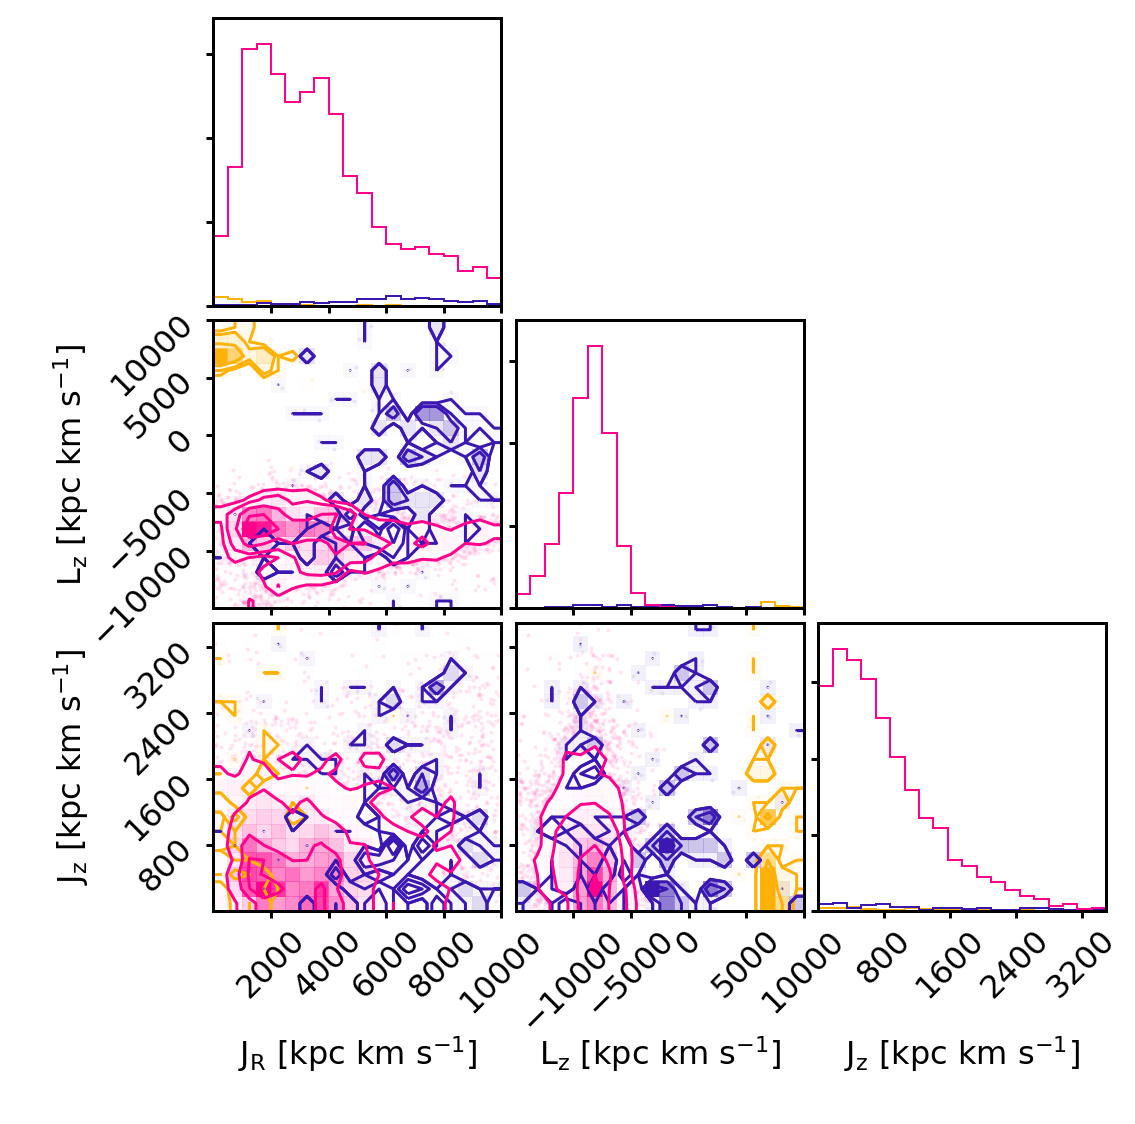

In [37]:
zsignchange = [True, False, False]
excludedisk = [True, True, False]

for jj in range(3):
    if zsignchange[jj]: 
        print("exclude particles which change signs while in disk radius")
        infilename = 'auriga/surviving_GC_zsignchange_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}_jan19.txt'
    elif excludedisk[jj]:
        print('exclude particles which are in disk')
        infilename = 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}_jan19.txt'
    else:
        print('keep em all')
        infilename = 'auriga/surviving_GC_all_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}_jan19.txt'
counter = 0
colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']
labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']

actionrange = ([0., 10000.], [-15000., 10000.], [0., 3500.])
for prognr in [4,3,2]:
    progcolor = colors[prognr]
    survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms = np.loadtxt(filedir + 'actions/right_potential/progenitor{}/actions_snap_127_dec18.txt'.format(prognr))
    data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])
    if counter == 0:
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, bbox_inches = 'tight', range = actionrange) #range = actionrange, 
        counter += 1
    else:         
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, bbox_inches = 'tight', fig = figure, range = actionrange) #range = actionrange, 
figure.savefig(plotdir + 'actions/right_potential/prog234_actions_snap_127.png')


In [ ]:
a